# <h1><center>**`Employee Salaries Project`**</center></h1>

### **`Problem Statement`**


To predict the salary of employee based on the information provided in the dataset.

- ### `How will the company profit from this solution?`
1. Companies can't keep track of their finance while paying salaries to employees.
2. Companies can understand what factors affects their finance. for example: location , employee experience, education qualification, etc.
3. Companies can get data about their competition companies finance and improve their own on basis of that data.
4. They can get an optimized range of salaries that should be given to their employees based on factors such as job type, employee experience, Education qualification, etc. that will reduce spending of extra  money.

- ### `How will the employee profit from this solution?`

1. Employees find it difficult to know what factors affect their salaries.
2. Employees can find companies matching their salary requirement based on job title, experience, etc.
3. They can understand what factor is affecting their salaries so they can improve working on that factor. 
4. They can get data about salaries paid by other companies for same job title, experience, education qualification, etc so they can to get a raise in their salaries.



Dataset link: https://www.kaggle.com/datasets/pavanelisetty/salarypredictions

In [ ]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from tqdm import tqdm

In [ ]:
# Loading the train_dataset, train_salaries, test_dataset
train_data = pd.read_csv('train_dataset.csv')
train_data_salaries = pd.read_csv('train_salaries.csv')
test_data = pd.read_csv('test_dataset.csv')

In [ ]:
train_data.head()

jobId companyId         jobType       degree      major  \
0  JOB1362684407687    COMP37             CFO      MASTERS       MATH   
1  JOB1362684407688    COMP19             CEO  HIGH_SCHOOL       NONE   
2  JOB1362684407689    COMP52  VICE_PRESIDENT     DOCTORAL    PHYSICS   
3  JOB1362684407690    COMP38         MANAGER     DOCTORAL  CHEMISTRY   
4  JOB1362684407691     COMP7  VICE_PRESIDENT    BACHELORS    PHYSICS   

  industry  yearsExperience  milesFromMetropolis  
0   HEALTH               10                   83  
1      WEB                3                   73  
2   HEALTH               10                   38  
3     AUTO                8                   17  
4  FINANCE                8                   16

In [ ]:
train_data_salaries.head()

jobId  salary
0  JOB1362684407687     130
1  JOB1362684407688     101
2  JOB1362684407689     137
3  JOB1362684407690     142
4  JOB1362684407691     163

In [ ]:
test_data.head()

jobId companyId  jobType       degree    major industry  \
0  JOB1362685407687    COMP33  MANAGER  HIGH_SCHOOL     NONE   HEALTH   
1  JOB1362685407688    COMP13   JUNIOR         NONE     NONE     AUTO   
2  JOB1362685407689    COMP10      CTO      MASTERS  BIOLOGY   HEALTH   
3  JOB1362685407690    COMP21  MANAGER  HIGH_SCHOOL     NONE      OIL   
4  JOB1362685407691    COMP36   JUNIOR     DOCTORAL  BIOLOGY      OIL   

   yearsExperience  milesFromMetropolis  
0               22                   73  
1               20                   47  
2               17                    9  
3               14                   96  
4               10                   44

In [ ]:
# Adding salary data to train_dataset
train_data['salary']=train_data_salaries['salary']


# Basic EDA

In [ ]:
train_data.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
 8   salary               1000000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 68.7+ MB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [ ]:
 train_data.describe()

yearsExperience  milesFromMetropolis          salary
count   1000000.000000       1000000.000000  1000000.000000
mean         11.992386            49.529260      116.061818
std           7.212391            28.877733       38.717936
min           0.000000             0.000000        0.000000
25%           6.000000            25.000000       88.000000
50%          12.000000            50.000000      114.000000
75%          18.000000            75.000000      141.000000
max          24.000000            99.000000      301.000000

In [ ]:
test_data.describe()

yearsExperience  milesFromMetropolis
count   1000000.000000       1000000.000000
mean         12.002104            49.526414
std           7.213179            28.889713
min           0.000000             0.000000
25%           6.000000            25.000000
50%          12.000000            50.000000
75%          18.000000            75.000000
max          24.000000            99.000000

In [ ]:
# length of train and test dataset
print('train data length:',len(train_data))
print('test data length:',len(test_data))

train data length: 1000000
test data length: 1000000


In [ ]:
# finding unique values in train_dataset
for x in train_data.columns:
    print(x,':',len(train_data[x].unique()))


jobId : 1000000
companyId : 63
jobType : 8
degree : 5
major : 9
industry : 7
yearsExperience : 25
milesFromMetropolis : 100
salary : 280


In [ ]:
#finding unique values in test_dataset
for x in test_data.columns:
    print(x,':',len(test_data[x].unique()))


jobId : 1000000
companyId : 63
jobType : 8
degree : 5
major : 9
industry : 7
yearsExperience : 25
milesFromMetropolis : 100


In [ ]:
# Checking for missing values in all the columnns of the train_dataset
train_data.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

In [ ]:
 # Checking for missing values in all the columnns of the test_dataset
test_data.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

## removing 'jobId' and 'companyId' data from train and test data

In [ ]:
# dropping jobId and companyId from train_dataset as we don't need them
train_data = train_data.drop(['jobId','companyId'],axis=1)

train_data

jobType       degree      major   industry  yearsExperience  \
0                  CFO      MASTERS       MATH     HEALTH               10   
1                  CEO  HIGH_SCHOOL       NONE        WEB                3   
2       VICE_PRESIDENT     DOCTORAL    PHYSICS     HEALTH               10   
3              MANAGER     DOCTORAL  CHEMISTRY       AUTO                8   
4       VICE_PRESIDENT    BACHELORS    PHYSICS    FINANCE                8   
...                ...          ...        ...        ...              ...   
999995  VICE_PRESIDENT    BACHELORS  CHEMISTRY     HEALTH               19   
999996             CTO  HIGH_SCHOOL       NONE    FINANCE               12   
999997          JUNIOR  HIGH_SCHOOL       NONE  EDUCATION               16   
999998             CFO      MASTERS       NONE     HEALTH                6   
999999          JUNIOR    BACHELORS       NONE  EDUCATION               20   

        milesFromMetropolis  salary  
0                        83     130  
1                        73     101  
2                        38     137  
3                        17     142  
4                        16     163  
...                     ...     ...  
999995                   94      88  
999996                   35     160  
999997                   81      64  
999998                    5     149  
999999                   11      88  

[1000000 rows x 7 columns]

In [ ]:
#same for the test_dataset
test_data = test_data.drop(['jobId','companyId'],axis=1)
test_data

jobType       degree    major industry  yearsExperience  \
0              MANAGER  HIGH_SCHOOL     NONE   HEALTH               22   
1               JUNIOR         NONE     NONE     AUTO               20   
2                  CTO      MASTERS  BIOLOGY   HEALTH               17   
3              MANAGER  HIGH_SCHOOL     NONE      OIL               14   
4               JUNIOR     DOCTORAL  BIOLOGY      OIL               10   
...                ...          ...      ...      ...              ...   
999995  VICE_PRESIDENT    BACHELORS     MATH      OIL               14   
999996         MANAGER         NONE     NONE   HEALTH               20   
999997         JANITOR         NONE     NONE      OIL                1   
999998             CTO     DOCTORAL     MATH      OIL               14   
999999          JUNIOR         NONE     NONE      OIL               16   

        milesFromMetropolis  
0                        73  
1                        47  
2                         9  
3                        96  
4                        44  
...                     ...  
999995                    3  
999996                   67  
999997                   91  
999998                   63  
999999                   31  

[1000000 rows x 6 columns]

**Checking for categorical columns in the dataset**

By observing the train_data.info() cell, we can bifurcate the datatype for which the object is the values which indicates those are the categorical columns. This dataset has more categorical columns than numerical values

1. jobType
2. degree
3. major
4. industry

In [ ]:
# creating two empty list to store categorical column names and numerical column names respectively
categorical_list = []
var_list = []
# looping on whole dataset for getting list of categorical data column name
for x in train_data.columns:
    if train_data[x].dtype=='object':
      categorical_list.append(x)
    elif train_data[x].dtype=='int64':
      var_list.append(x)
    elif train_data[x].dtype=='float64':
      var_list.append(x)

## Correlation Matrix

## From below correlation matrix:
1. yearsExperience and salary are positively correlated.

2. yearsExperience and milesFromMetropolis have no correlation.

3. milesFromMetropolis and salary are weakly negatively correlated.

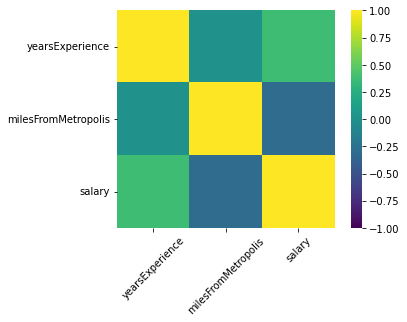

In [ ]:
# Correlation metrix using seaborn
ax = sns.heatmap(corr,vmin=-1,vmax=1,center=0,cmap='viridis',square=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

## Chi-square Test

In [ ]:
# importing necessary libraries for chi-square test
from scipy.stats import chi2_contingency
from scipy.stats import chi2

def perform_chi_square_test(var_1,var_2):
    
    #Contingency Table
    contingency_table = pd.crosstab(train_data[var_1],train_data[var_2])
    
    #Observed Values
    observed_values = contingency_table.values
    
    #Expected Values
    b = chi2_contingency(contingency_table)
    expected_values = b[3]
    
    #Degree of Freedom
    no_of_rows = len(contingency_table.iloc[0:,0])
    no_of_columns = len(contingency_table.iloc[0:,0])
    degree_f=(no_of_rows-1)*(no_of_columns-1)
    print("Degree of Freedom: ",degree_f)
    
    #Significance Level 5%
    alpha = 0.05
    print('Significance level: ',alpha)
    
    #chi-square statistic
    chi_square = sum([(o-e)**2./e for o,e in zip(observed_values,expected_values) ])
    chi_square_statistic = chi_square[0]+chi_square[1]
    print("chi-square statistic: ",chi_square_statistic)
    
    #critical_value
    critical_value=chi2.ppf(q=1-alpha,df=degree_f)
    print('critical_value:',critical_value)
    
    #p-value
    p_value =1-chi2.cdf(x=chi_square_statistic,df=degree_f)

    print('p-value:',p_value)
          
    if chi_square_statistic>=critical_value:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")

    if p_value<=alpha:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")

In [ ]:
# looping on categorical data list and using function for performing chi-square test on columns from dataset
for x in categorical_list:
    for i in categorical_list:
        if i !=x:
            print('chi_square test on:',x,'','\n')
            perform_chi_square_test(x,i)
            print('------------------------------------------------\n')

chi_square test on: jobType  

Degree of Freedom:  49
Significance level:  0.05
chi-square statistic:  50117.72406771936
critical_value: 66.3386488629688
p-value: 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables
------------------------------------------------

chi_square test on: jobType  

Degree of Freedom:  49
Significance level:  0.05
chi-square statistic:  16703.025256041707
critical_value: 66.3386488629688
p-value: 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables
------------------------------------------------

chi_square test on: jobType  

Degree of Freedom:  49
Significance level:  0.05
chi-square statistic:  14.913329934821567
critical_value: 66.3386488629688
p-value: 0.9999993732944399
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 catego

From above chi-square test:

- correlated variables:

  1. jobtype and degree
  2. jobtype and major
  3. degree and major


## Scatter Plot

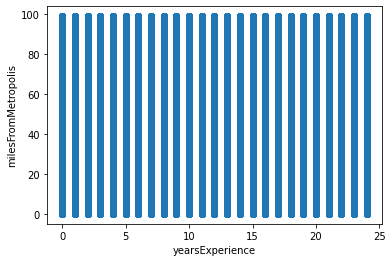

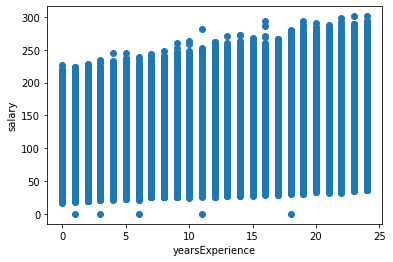

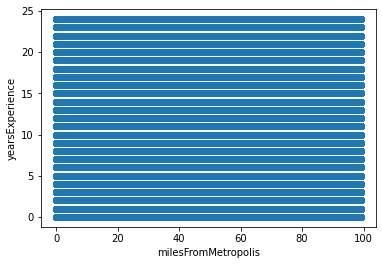

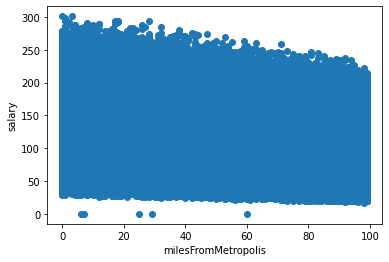

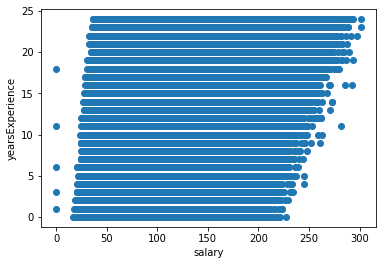

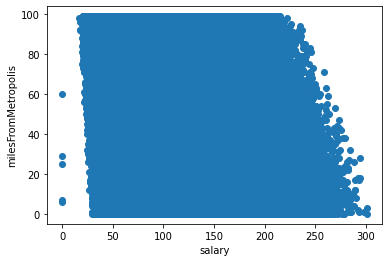

In [ ]:
def plot_scatter(x, y):
    plt.figure()
    plt.xlabel(x)
    plt.ylabel(y)
    plt.scatter(train_data[x],train_data[y])
# Looping through the different columns 
for i in var_list:
  for j in var_list:
    if i !=j:
      plot_scatter(i,j)

From above scatter plot

1. Increase in value on yearsExperience axis results in increase of values on salary axis. That is they are positively correlated.

2. Increase in value on 
milesFromMetropolis axis results in decrease of values on salary axis. That is they are negatively correlated.

2. There is no change in values of yearExperience vs milesFromMetropolis graph. That is there is no correlation between these variables.

## Histogram

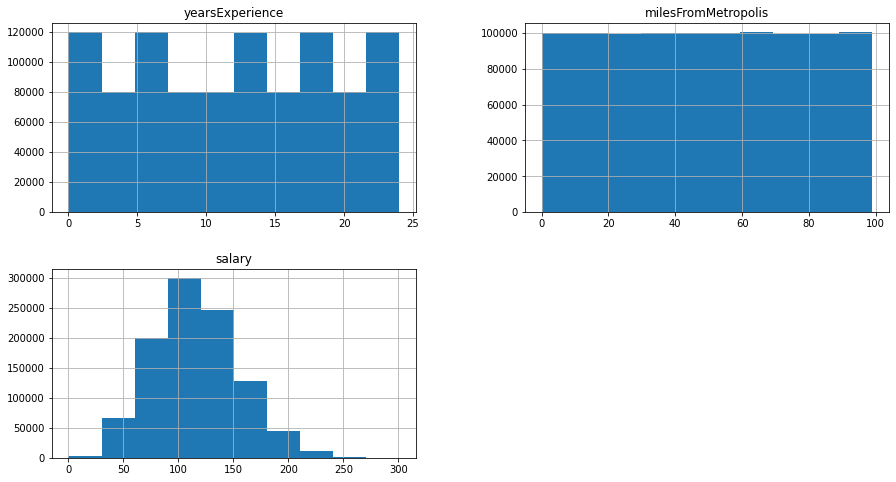

In [ ]:
train_data.hist(figsize=(15,8))
plt.show()

From the above histogram

1. yearsExperience data distribution is symmetric.

2. milesFromMetropolis data distribution is symmetric.

3. salary data distribution is symmetric, unimodel (it has only one peak in distribution)


## groupby

Using groupby to chunk up the data into subsets for further analysis.

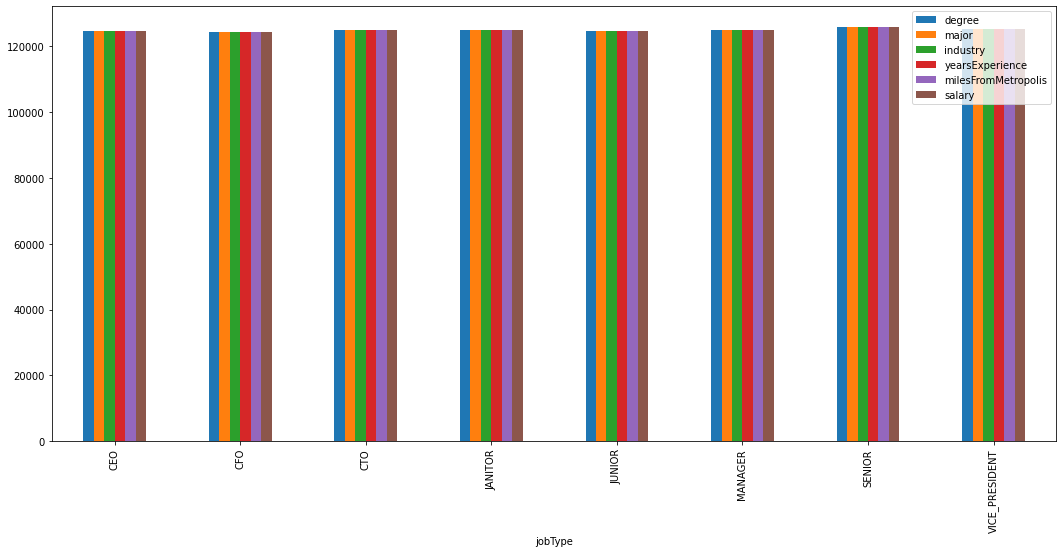

In [ ]:
train_data.groupby('jobType').count().plot(kind='bar',figsize=(18,8))
plt.show()

From above graph:
1. All data for each jobType is distributed equally.

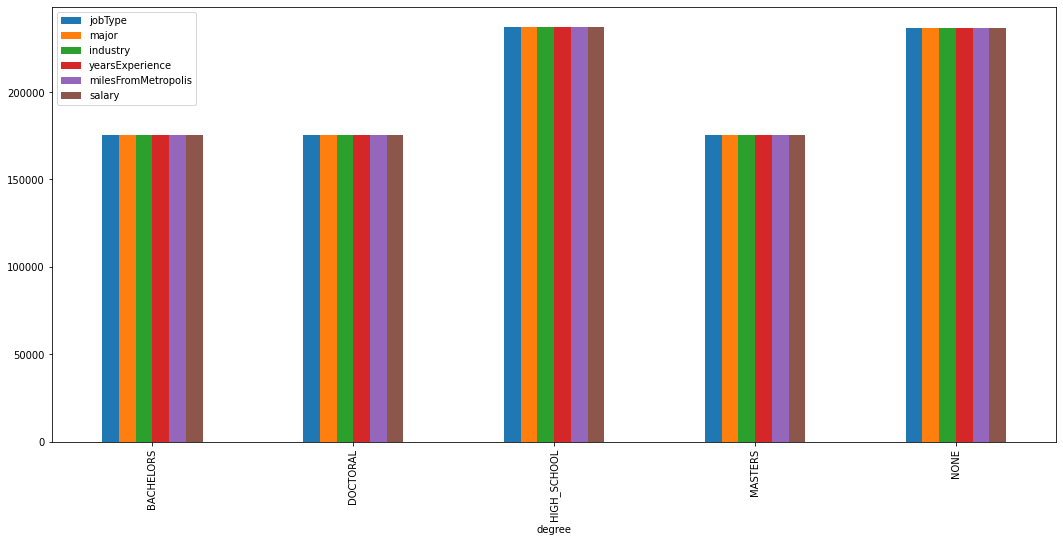

In [ ]:
train_data.groupby('degree').count().plot(kind='bar',figsize=(18,8))
plt.show()

From above graph:

1. All data for BACHELORS, DOCTORAL, MASTERS are equally distributed.

2. All data for HIGH_SCHOOL, NONE are equally distributed.

3. Here the data distribution between group of BACHELORS, DOCTORAL, MASTERS is less than data distribution for group HIGH_SCHOOL, NONE

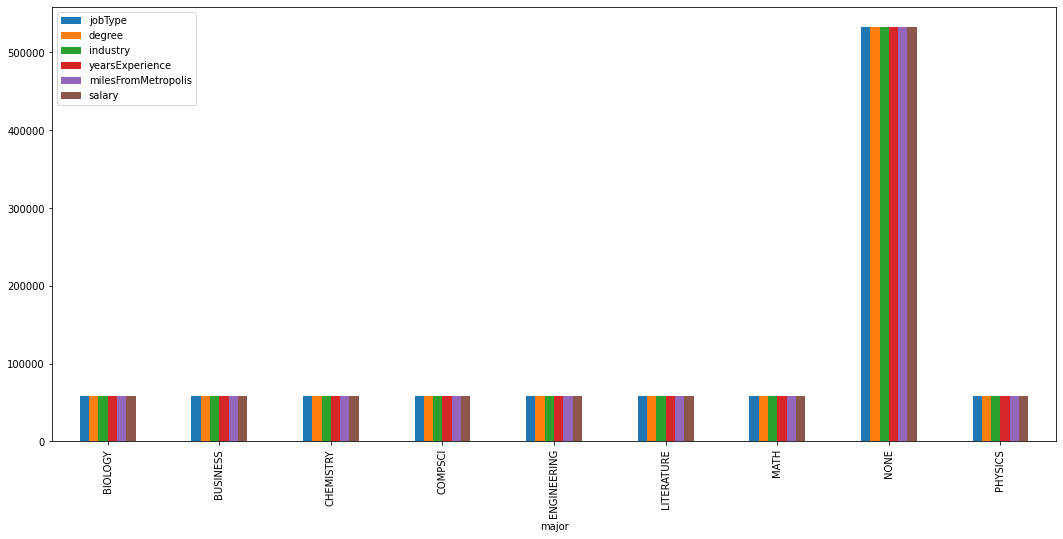

In [ ]:
train_data.groupby('major').count().plot(kind='bar',figsize=(18,8))
plt.show()

From above graph:

1. Except "NONE" all data for each major are equally distributed.

2. There is large distribution of data for major NONE as compared to other major's


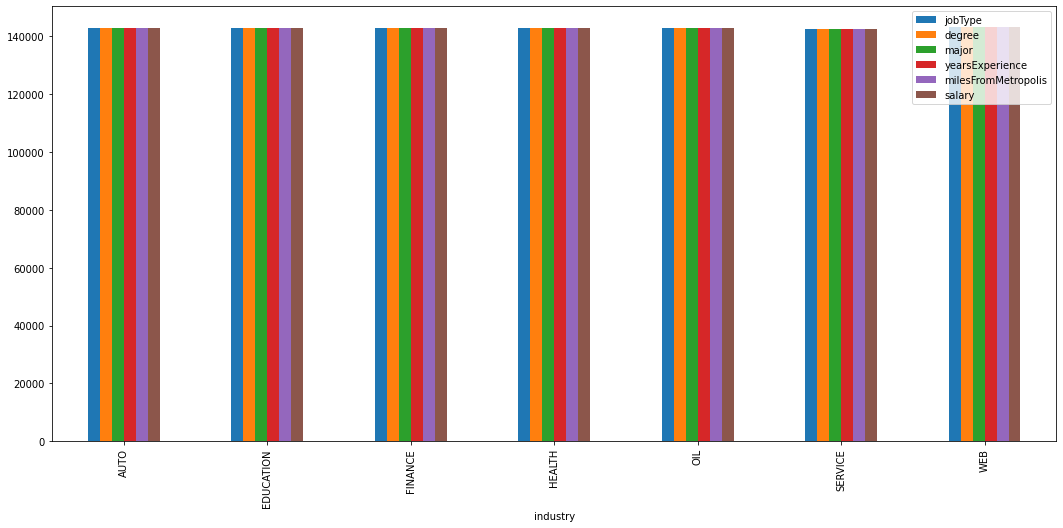

In [ ]:
train_data.groupby('industry').count().plot(kind='bar',figsize=(18,8))
plt.show()

from above graph:
1. All data for each industry is distributed equally.

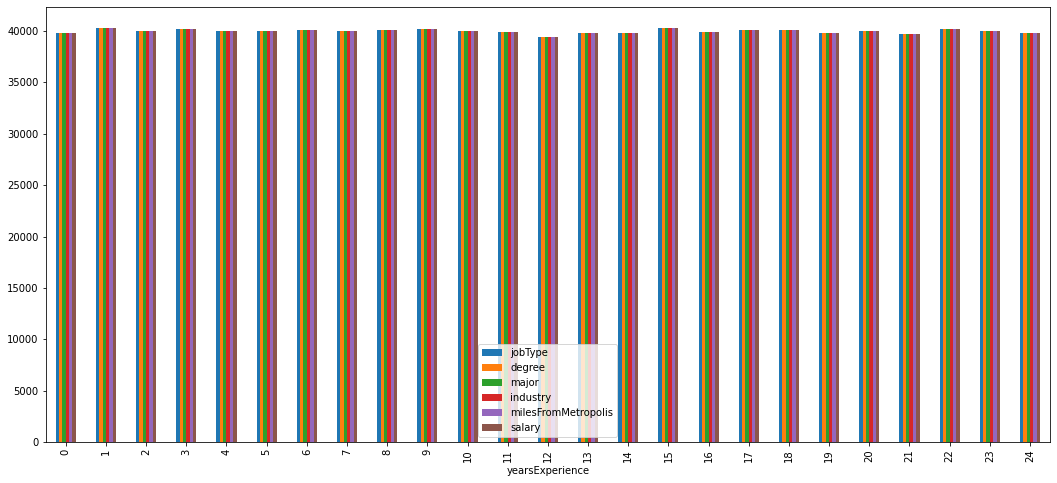

In [ ]:
train_data.groupby('yearsExperience').count().plot(kind='bar',figsize=(18,8))
plt.show()

from above graph:
1. All data for each yearsExperience is distributed almost equally.

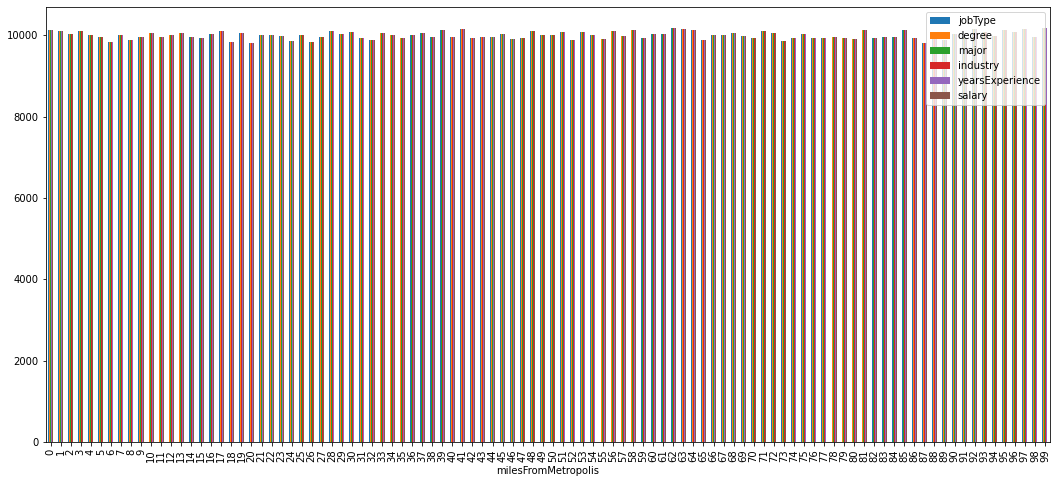

In [ ]:
train_data.groupby('milesFromMetropolis').count().plot(kind='bar',figsize=(18,8))
plt.show()

from above graph:
1. All data for each milesFromMetropolis is distributed almost equally.

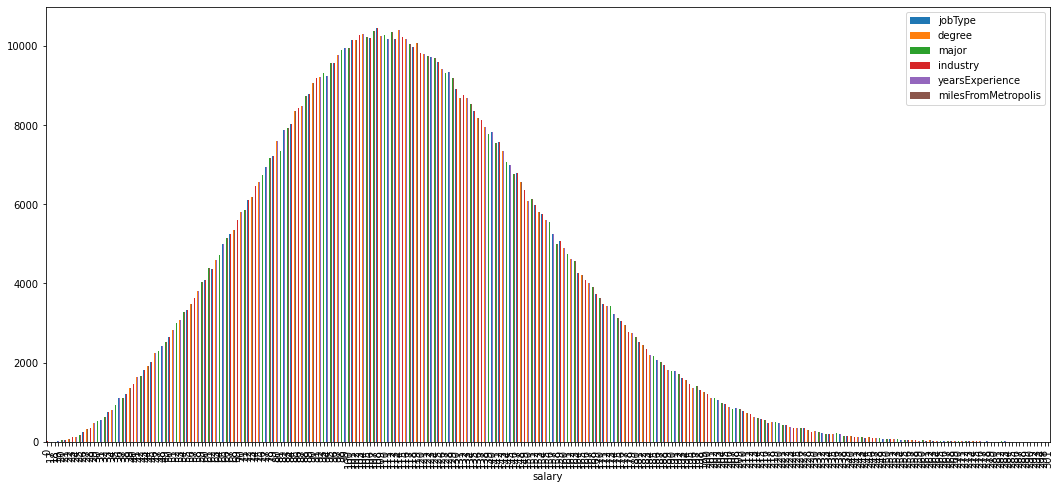

In [ ]:
train_data.groupby('salary').count().plot(kind='bar',figsize=(18,8))
plt.show()

from above graph:
1. All data for each value of salary is distributed symmetrical and unimodel.

## Box Plot

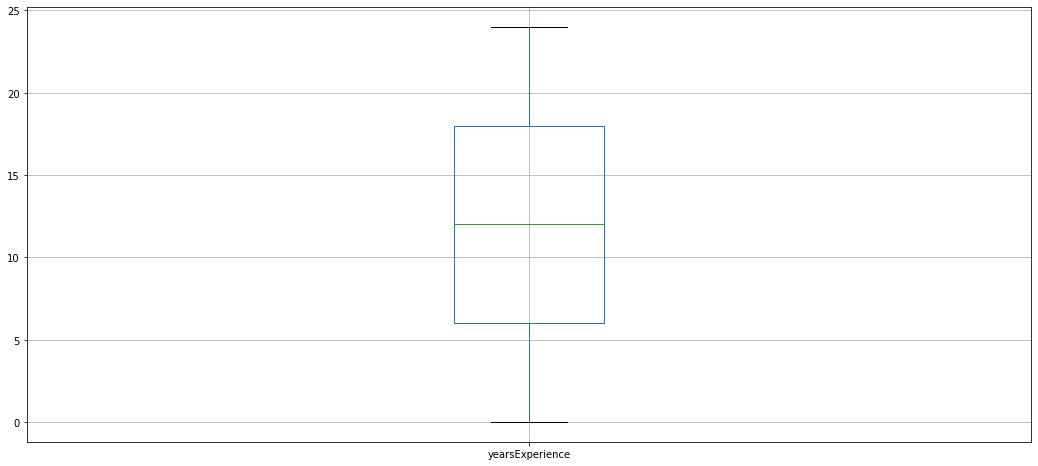

In [ ]:
train_data.boxplot(column='yearsExperience',figsize=(18,8))
plt.show()

from above box plot graph:

- yearsExperience
  1. 25% of employees from dataset has yearExperience of between range 0 to 6.
  2. 25% of employee has yearExperience between range 6 to 12.
  3. 25% of employee has yearExperience between range 12 to 18.
  4. 25% of employee has yearExperience between range 18 to 24

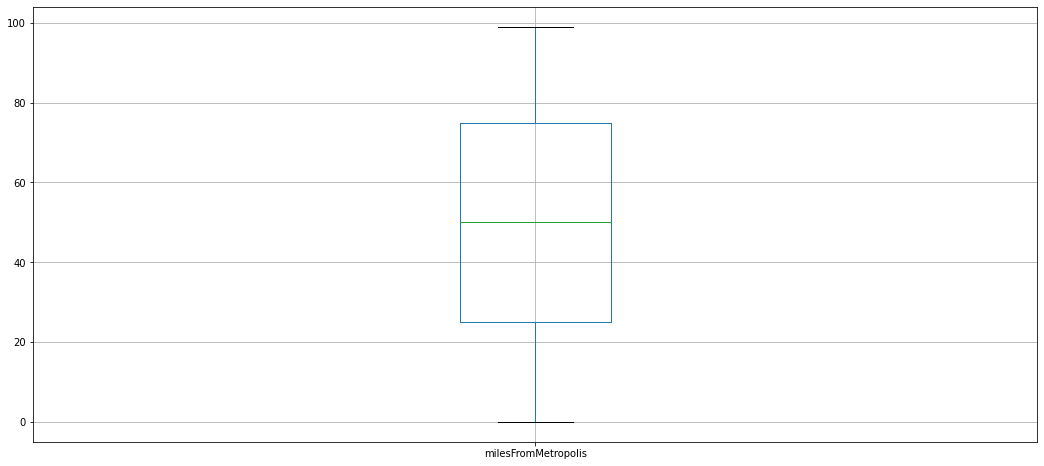

In [ ]:
train_data.boxplot(column='milesFromMetropolis',figsize=(18,8))
plt.show()

from above box plot graph:

- yearsExperience
  1. 25% of employees from dataset has value of milesFromMetropolis between range 0 to 24.
  2. 25% of employee has value of milesFromMetropolis between range 24 to 52.
  3. 25% of employee has value of milesFromMetropolis between range 52 to 76.
  4. 25% of employee has value of milesFromMetropolis between range 76 to 100

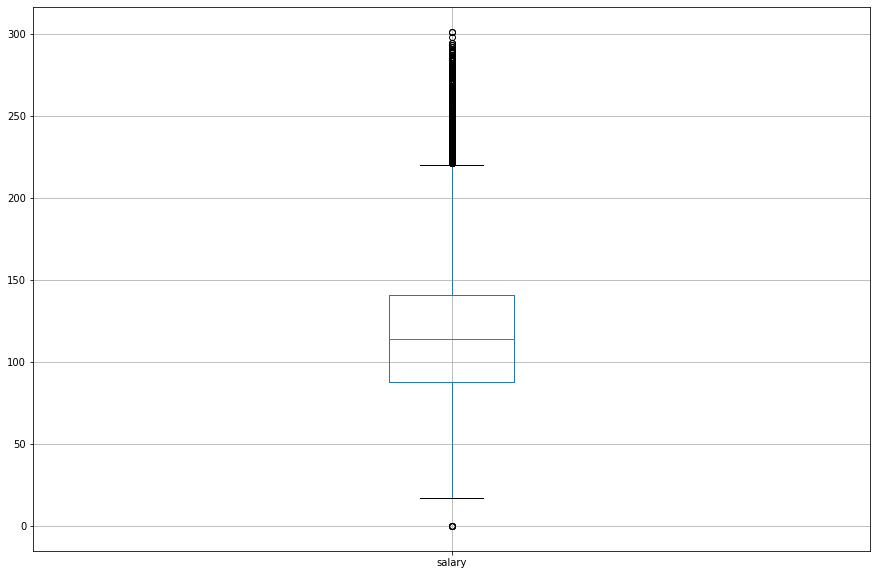

In [ ]:
train_data.boxplot(column='salary', figsize=(15, 10))
plt.show()

from above box plot graph:

- yearsExperience
  1. 25% of employees from dataset has value of salary between range 0 to 88.
  2. 25% of employee has value of salary between range 88 to 120.
  3. 25% of employee has value of salary between range 120 to 150.
  4. 25% of employee has value of salary between range 150 to 300


- The mean salary is around 120

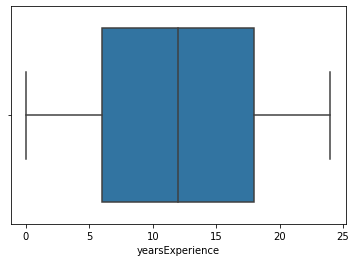

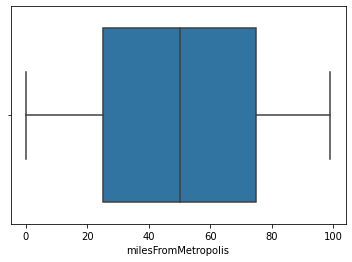

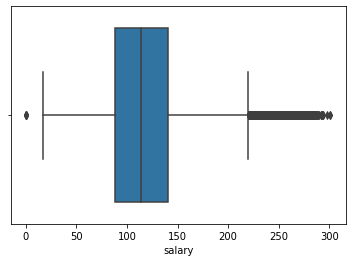

In [ ]:
# box plot using seaborn 
# box plot for yearsExperience column
# box plot for mileFromMetropolis column
# box plot for salary column
for x in var_list:
    sns.boxplot(train_data[x])
    plt.show()


## Violin Plot

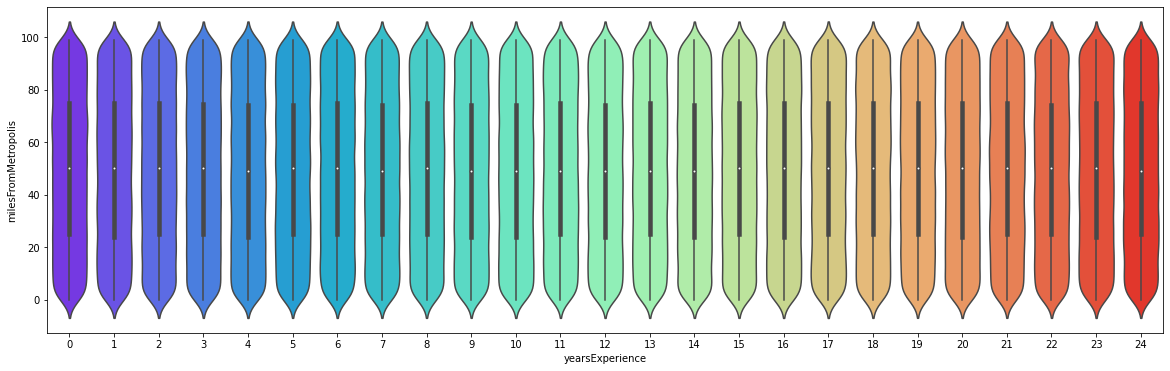

In [ ]:
plt.figure(figsize=(20,6))
sns.violinplot(x='yearsExperience',y='milesFromMetropolis',data=train_data,palette='rainbow')
plt.show()


from above violin plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.

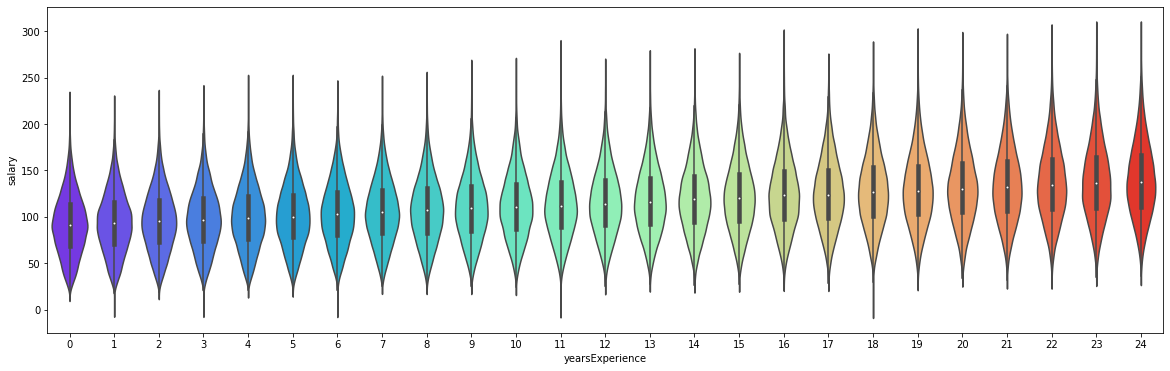

In [ ]:
plt.figure(figsize=(20,6))
sns.violinplot(x='yearsExperience',y='salary',data=train_data,palette='rainbow')
plt.show()

from above violin plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile. whereas median has the highest.
3. The salary range is increasing as we move right on the axis of yearExperience

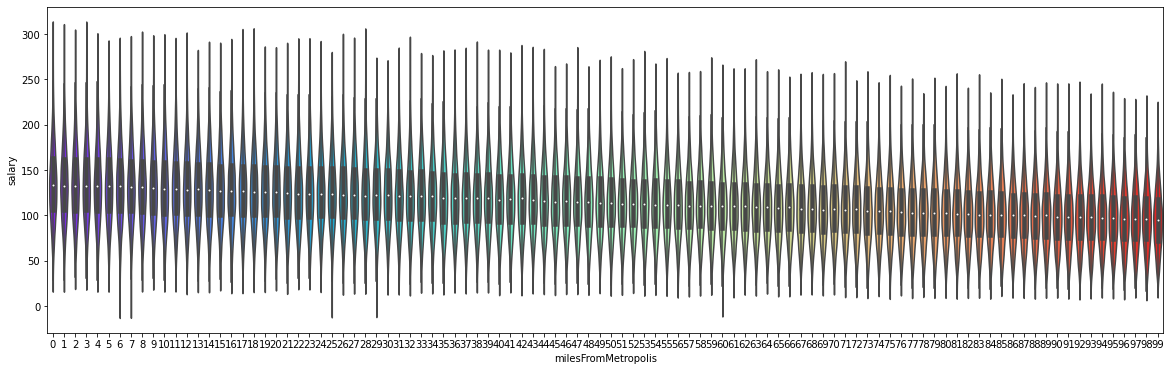

In [ ]:
plt.figure(figsize=(20,6))
sns.violinplot(x='milesFromMetropolis',y='salary',data=train_data,palette='rainbow')
plt.show()

from above violin plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile.
3. The salary range is decreasing as we move right on the axis of milesFromMetropolis


## Boxenplot


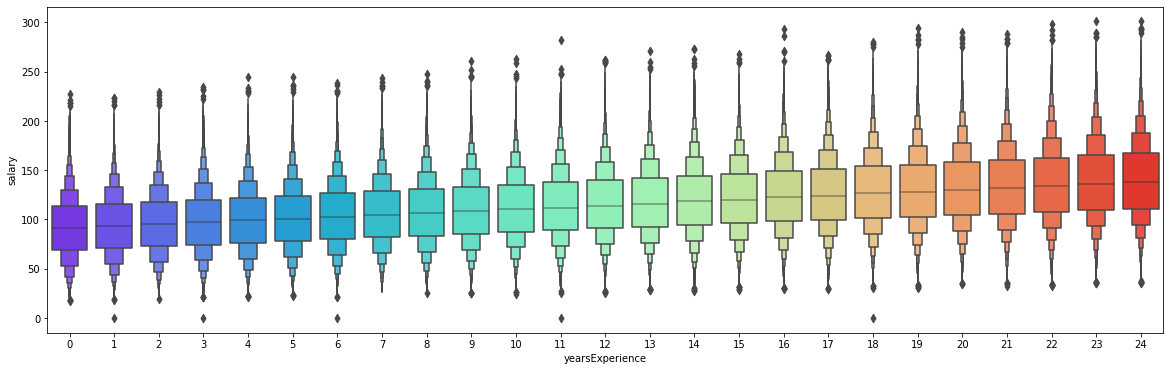

In [ ]:
plt.figure(figsize=(20,6))
sns.boxenplot(x='yearsExperience',y='salary',data=train_data,palette='rainbow')
plt.show()

from above boxen plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile. whereas median has the highest.
3. The salary range is increasing as we move right on the axis of yearExperience

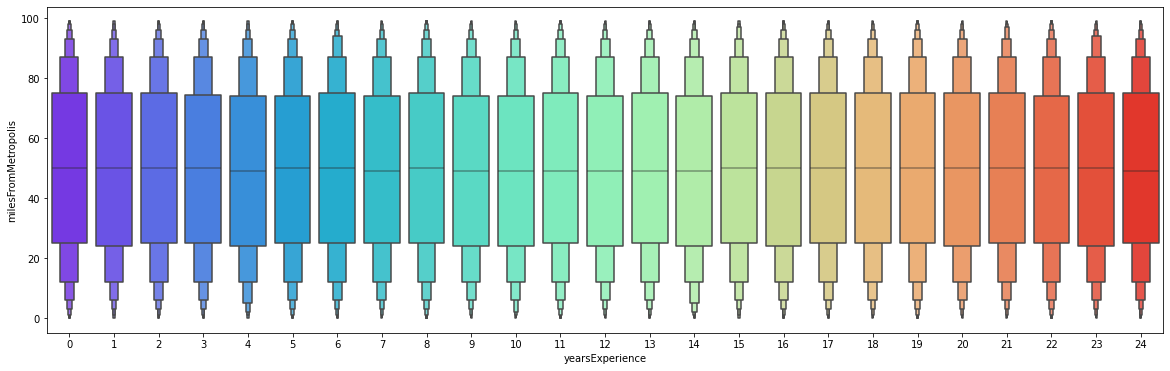

In [ ]:
plt.figure(figsize=(20,6))
sns.boxenplot(x='yearsExperience',y='milesFromMetropolis',data=train_data,palette='rainbow')
plt.show()

from above boxen plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.

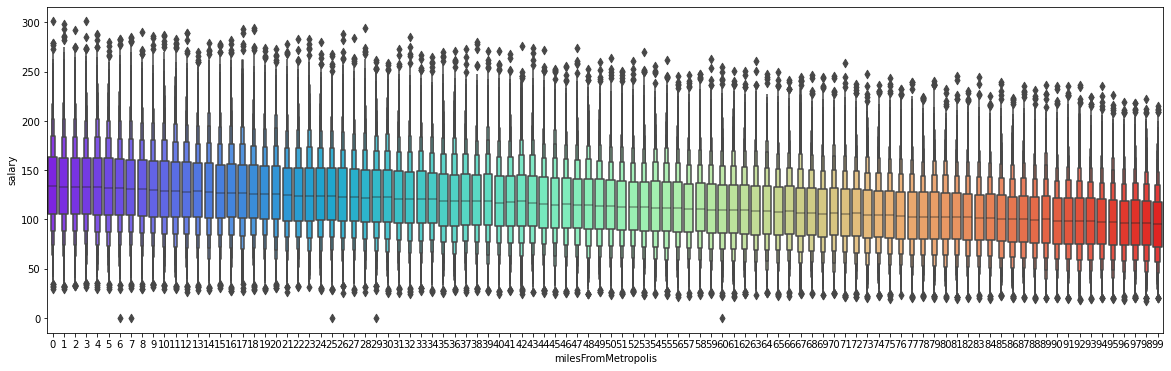

In [ ]:
plt.figure(figsize=(20,6))
sns.boxenplot(x='milesFromMetropolis',y='salary',data=train_data,palette='rainbow')
plt.show()

from above boxen plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile. whereas median has the highest.
3. The salary range is decreasing as we move right on the axis of milesFromMetropolis


## Point Plot

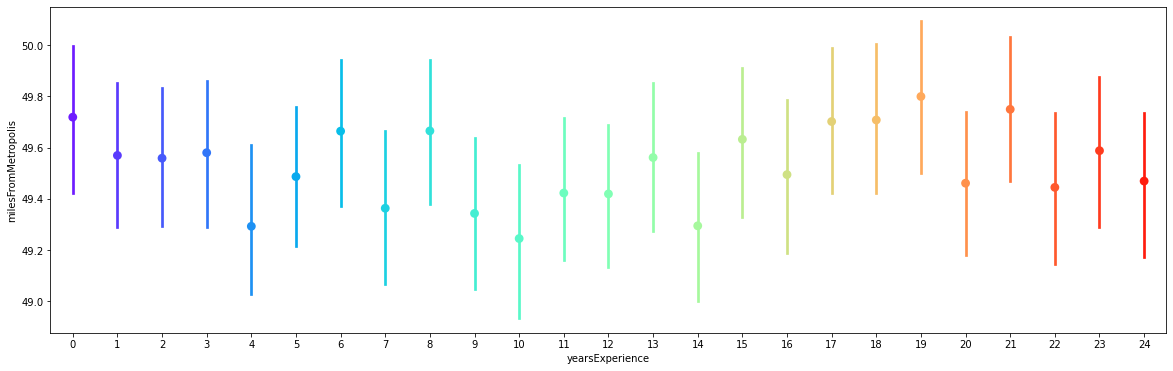

In [ ]:
plt.figure(figsize=(20,6))
sns.pointplot(x='yearsExperience',y='milesFromMetropolis',data=train_data,palette='rainbow')
plt.show()

From above point plot

The error bar shows that there is variability of association with each Y and X center point value. that is the milesFromMetropolis has dispersion of vales for each yearsExperience value

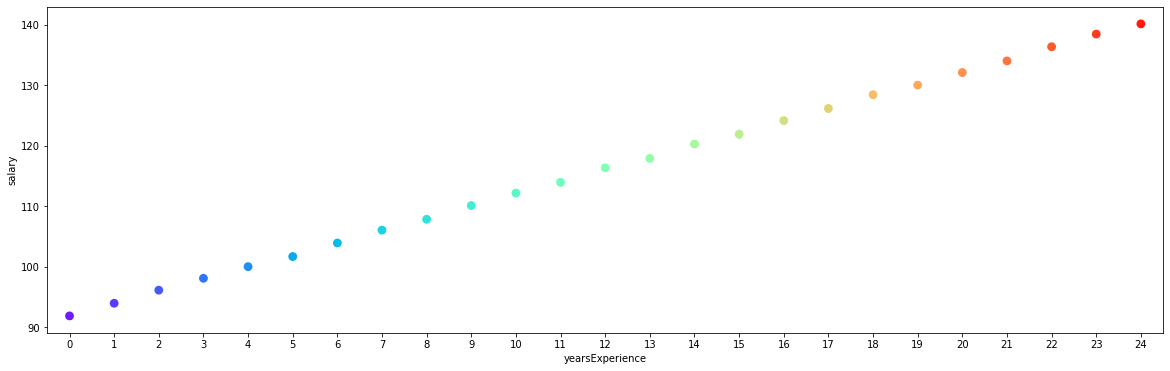

In [ ]:
plt.figure(figsize=(20,6))
sns.pointplot(x='yearsExperience',y='salary',data=train_data,palette='rainbow')
plt.show()

From above point plot

There is a increase in salary when there is a increase in yearsExperience

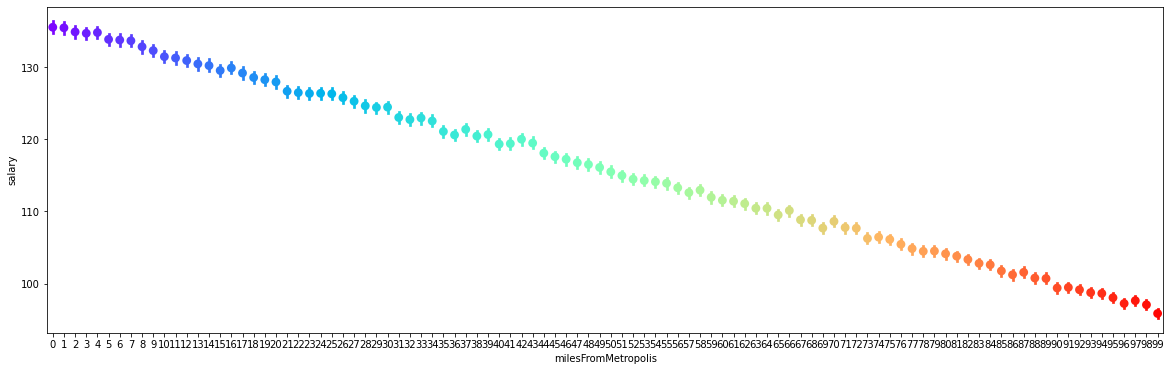

In [ ]:
plt.figure(figsize=(20,6))
sns.pointplot(x='milesFromMetropolis',y='salary',data=train_data,palette='rainbow')
plt.show()

From above point plot

There is a decrease in salary when there is a decrease in yearsExperience

## Count Plot

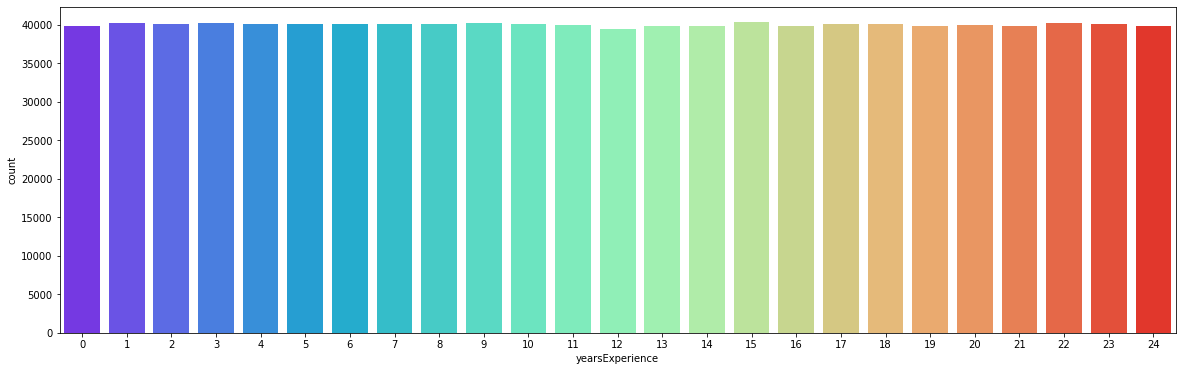

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot(x='yearsExperience',data=train_data,palette='rainbow')
plt.show()

From above count plot

distribution of values of yearExperience is equal over complete dataset, symmetrical.

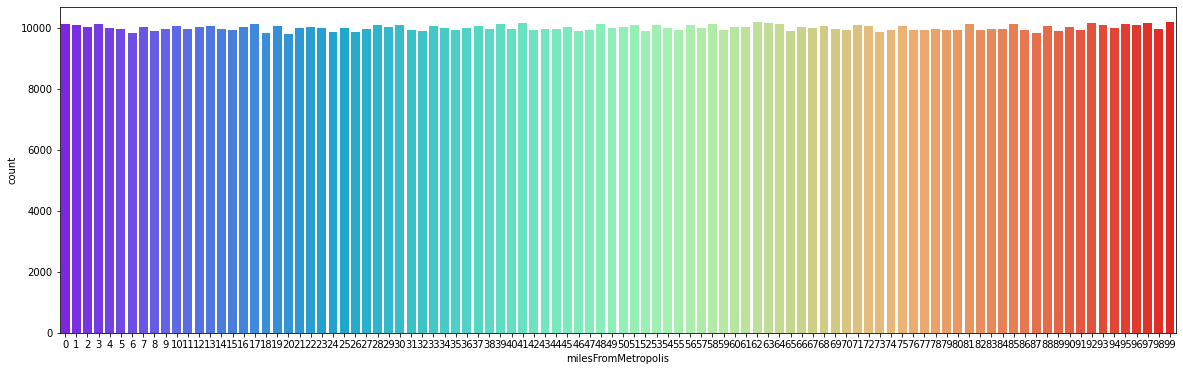

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot(x='milesFromMetropolis',data=train_data,palette='rainbow')
plt.show()

From above count plot

distribution of values of milesFromMetropolis is almost equal over complete dataset, symmetrical

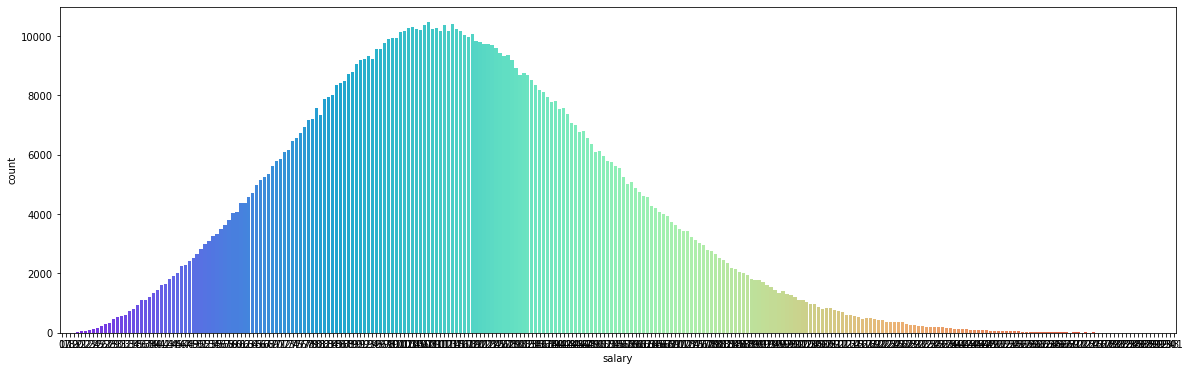

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot(x='salary',data=train_data,palette='rainbow')
plt.show()

From above count plot

distribution of values of yearExperience is symmetrical, unimodal.

## Swarm Plot

Plotting data on 50000 of 1000000 samples for clear visualization. It will also save time in plotting process. 

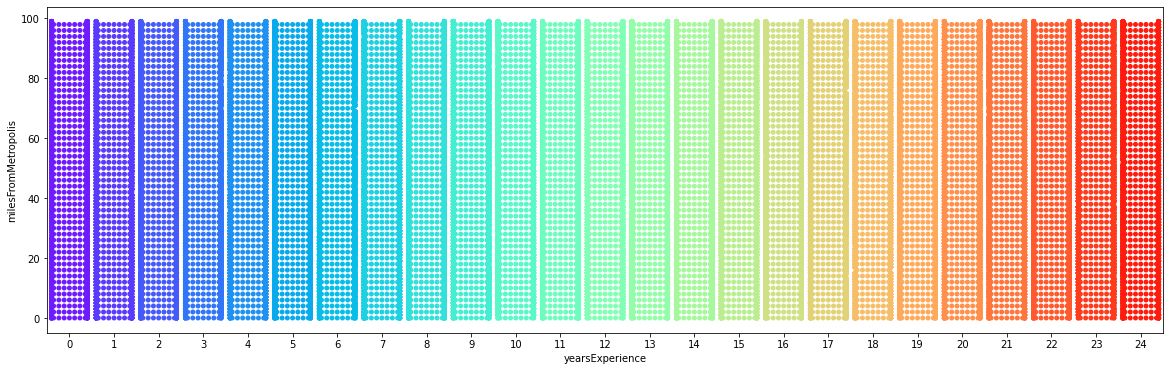

In [ ]:
plt.figure(figsize=(20,6))
sns.swarmplot(x='yearsExperience',y='milesFromMetropolis',data=train_data.iloc[1:50000],palette='rainbow')
plt.show()

From above swarm plot

distribution of values of yearExperience with respect to milesFromMetropolis is equal over complete dataset, symmetrical.

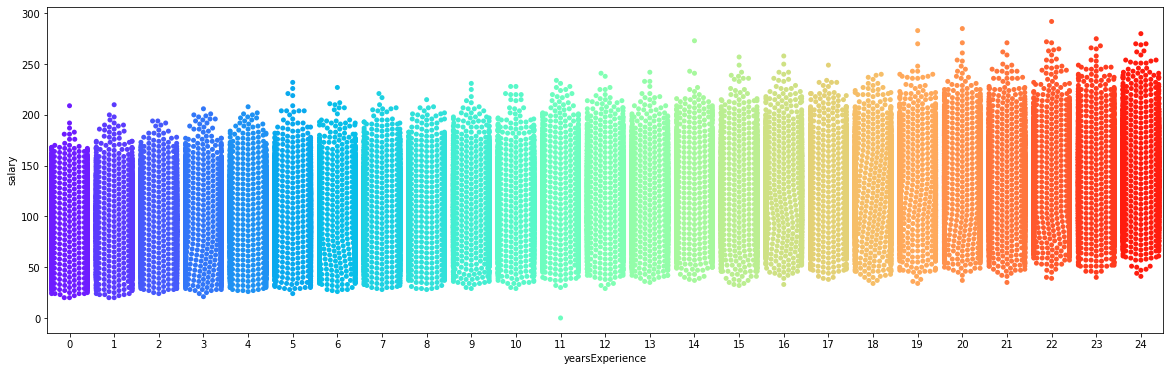

In [ ]:
plt.figure(figsize=(20,6))
sns.swarmplot(x='yearsExperience',y='salary',data=train_data.iloc[1:50000],palette='rainbow')
plt.show()

from above swarm plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.

2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is increasing as we move right on the axis of yearExperience

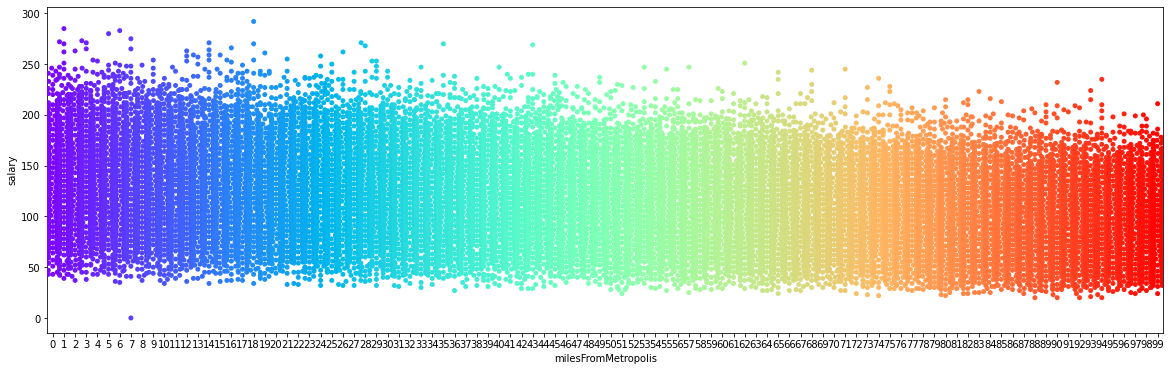

In [ ]:
plt.figure(figsize=(20,6))
sns.swarmplot(x='milesFromMetropolis',y='salary',data=train_data.iloc[1:50000],palette='rainbow')
plt.show()

from above swarm plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is decreasing as we move right on the axis of milesFromMetropolis

## Combine plot

Combination of boxenplot and swarm plot

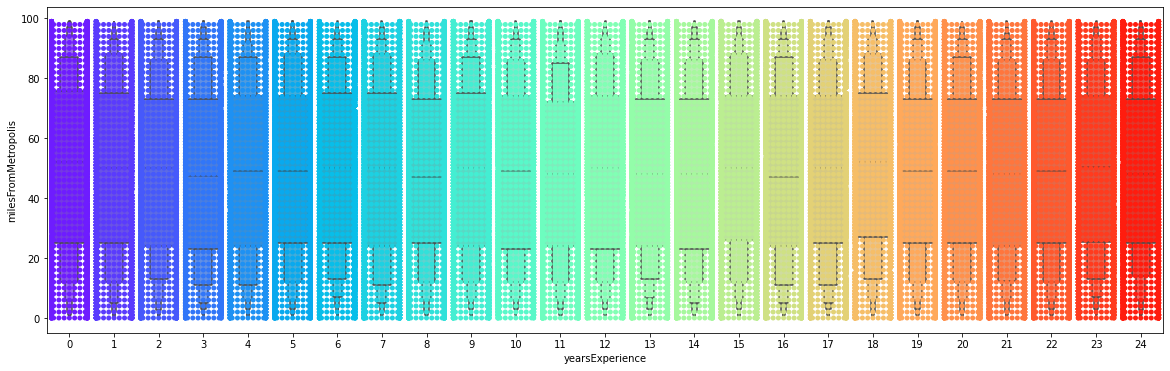

In [ ]:
plt.figure(figsize=(20,6))
sns.boxenplot(x='yearsExperience',y='milesFromMetropolis',data=train_data.iloc[1:50000],palette='rainbow')
sns.swarmplot(x='yearsExperience',y='milesFromMetropolis',data=train_data.iloc[1:50000],palette='rainbow')
plt.show()

From above combine plot

distribution of values of yearExperience with respect to milesFromMetropolis is equal over complete dataset, symmetrical.

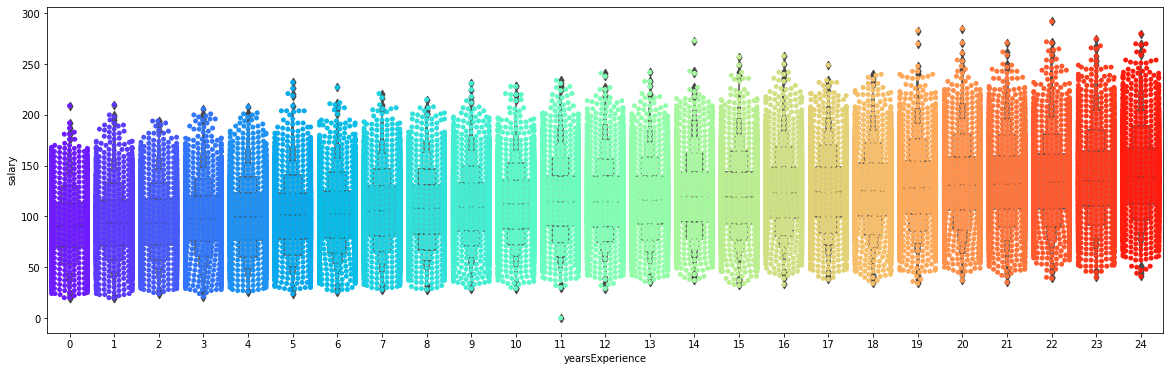

In [ ]:
plt.figure(figsize=(20,6))
sns.boxenplot(x='yearsExperience',y='salary',data=train_data.iloc[1:50000],palette='rainbow')
sns.swarmplot(x='yearsExperience',y='salary',data=train_data.iloc[1:50000],palette='rainbow')
plt.show()

from above combine plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.

2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is increasing as we move right on the axis of yearExperience

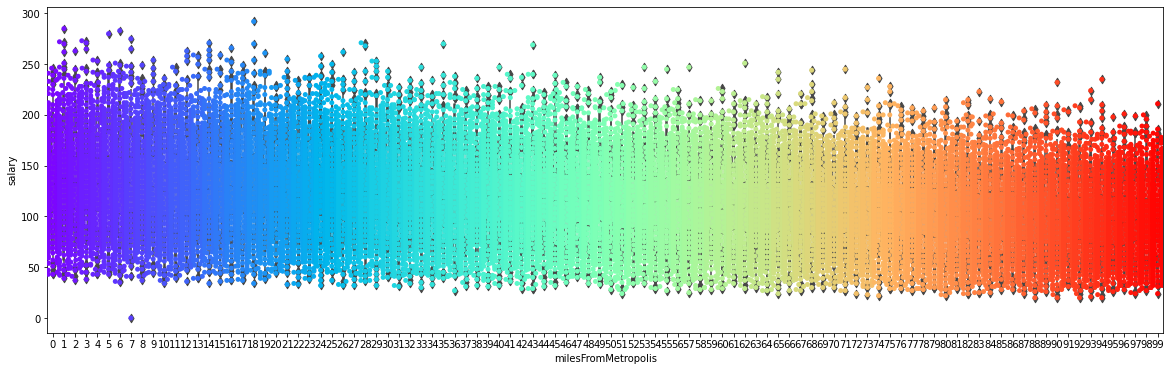

In [ ]:
plt.figure(figsize=(20,6))
sns.boxenplot(x='milesFromMetropolis',y='salary',data=train_data.iloc[1:50000],palette='rainbow')
sns.swarmplot(x='milesFromMetropolis',y='salary',data=train_data.iloc[1:50000],palette='rainbow')
plt.show()

from above combine plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is decreasing as we move right on the axis of milesFromMetropolis

# Strip Plot

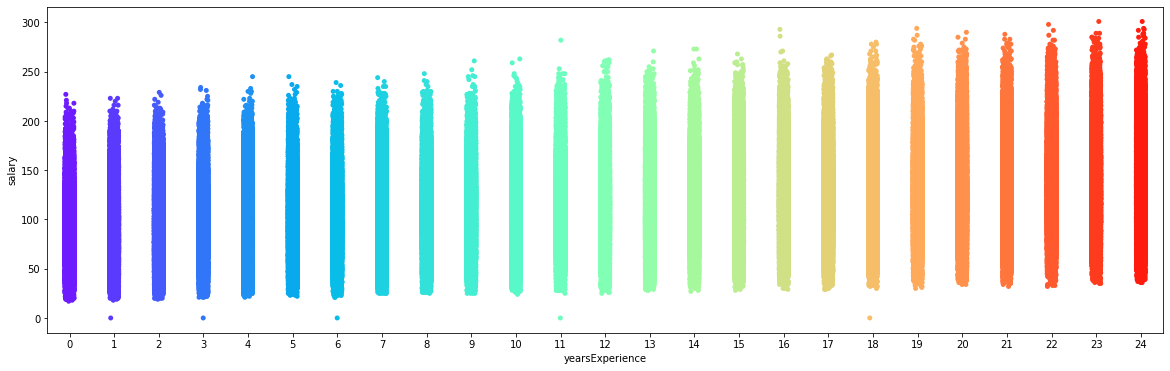

In [ ]:
plt.figure(figsize=(20,6))
sns.stripplot(x='yearsExperience',y='salary',data=train_data,palette='rainbow')
plt.show()

from above strip plot:

Distribution of values of mileFromMetropolis is equal for each values of yearsExperience

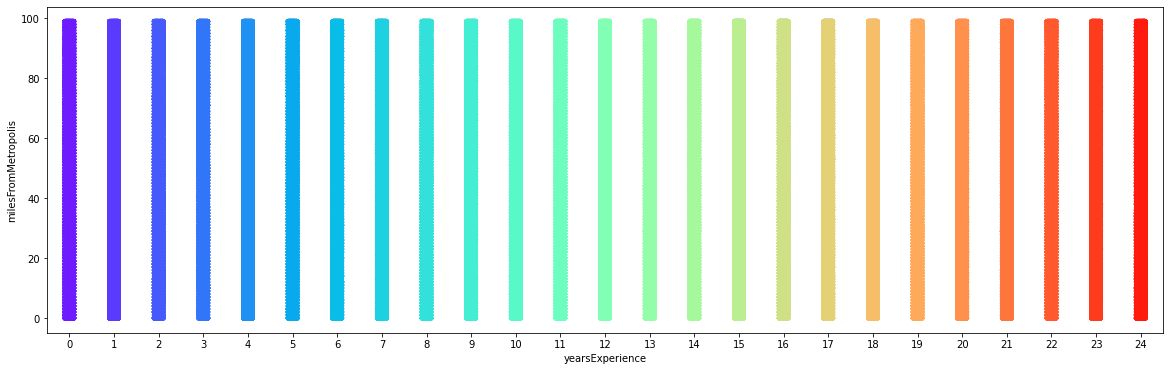

In [ ]:
plt.figure(figsize=(20,6))
sns.stripplot(x='yearsExperience',y='milesFromMetropolis',data=train_data,palette='rainbow')
plt.show()

from above strip plot:

Distribution of values of Salary increases for increase in values of yearsExperience

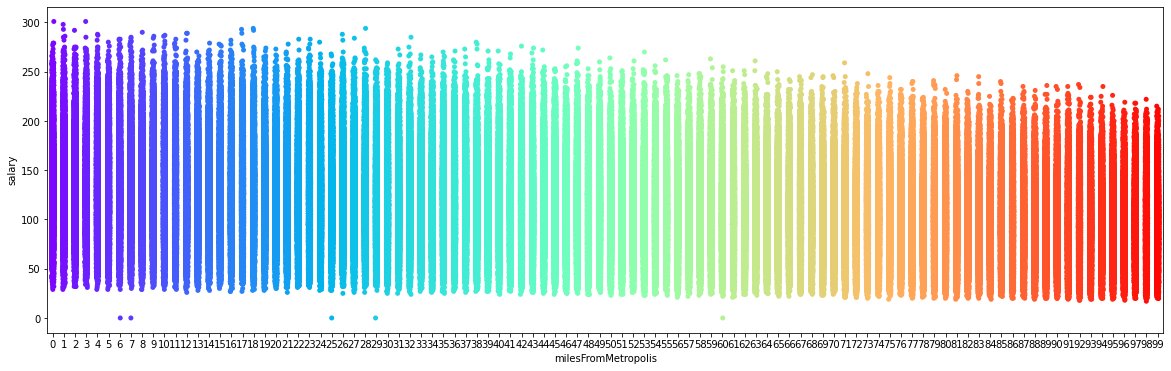

In [ ]:
plt.figure(figsize=(20,6))
sns.stripplot(x='milesFromMetropolis',y='salary',data=train_data,palette='rainbow')
plt.show()

from above strip plot:

Distribution of values of Salary decreases for increase in values of milesFromMetropolis

## Variance inflation factor (VIF)

In [ ]:
import statsmodels.api as sm

In [ ]:
# creating a dataframe of just numerical values
train_for_vif = train_data.drop(['jobType','degree','major','industry','salary'],axis=1)
# target values
target = train_data['salary']
# numerical values column names
names = ['yearsExperience','milesFromMetropolis']
train_for_vif.dropna(inplace=True)
names

['yearsExperience', 'milesFromMetropolis']

In [ ]:
# Calculating VIF for each feature.
for i in range(0, len(names)):
  # taking one column as target variable
  y = train_for_vif.loc[:,train_for_vif.columns==names[i]]
  
  # taking all other remaining columns as fetaure variable
  x = train_for_vif.loc[:,train_for_vif.columns!=names[i]]
  
  # fitting the OLS model on y and x
  model =sm.OLS(y,x)
  
  results = model.fit()
  
  # geting the r^2 value of results.
  rsq =results.rsquared
  
  # calculating vif value
  vif = round(1/(1-rsq),2)
  
  print("R Square value of {} columns is {} keeping all other columns as features".format(names[i],(round(rsq, 2))))
  print("Variance inflation Factor of {} columns is {} \n".format(names[i], vif))

R Square value of yearsExperience columns is 0.55 keeping all other columns as features
Variance inflation Factor of yearsExperience columns is 2.21 

R Square value of milesFromMetropolis columns is 0.55 keeping all other columns as features
Variance inflation Factor of milesFromMetropolis columns is 2.21 



Observations:

there is colinearity/multicolinearity between 
variables as the VIF value is almost upto 2.5

1. yearsExperience and milesFromMetropolis both have colinearity with all the variables.

## Dendrogram

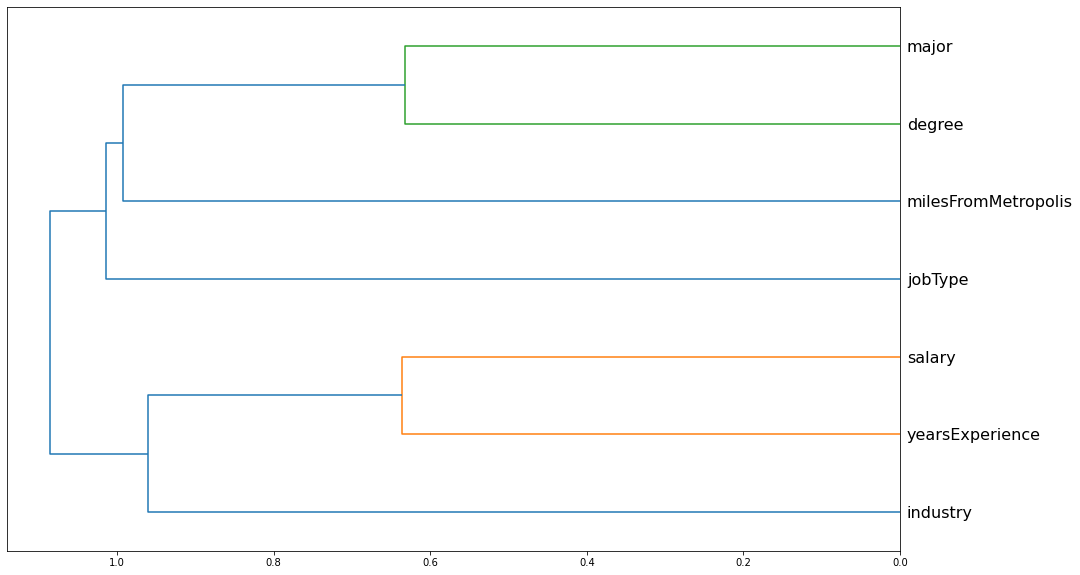

In [ ]:
# Plotting a Dendrogram on the columns of the dataset (use 50000 sample of 1000000)
X = train_data[1:50000]

import scipy
from scipy.cluster import hierarchy as hc

corr = np.round(scipy.stats.spearmanr(X).correlation,4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed,method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z,labels=X.columns,orientation='left',leaf_font_size=16)
plt.show()

observation from dendrogram

Strongly correlated variables:
1. major and degree
2. salary and yearsExperience

## Since, there are no missing values and all the data are distributed equally. We can start converting the categoricl values to numerical.

## Scaling

In [ ]:
# Helper function for scaling all the numerical data using MinMaxScalar
def scale_data(df,col):
  from sklearn.preprocessing import MinMaxScaler
  scaler = MinMaxScaler()

  df[col] = scaler.fit_transform(df[col])
  return df

In [ ]:
# Making a list of the column names to be scaled 
col_train =['yearsExperience','milesFromMetropolis']

# passing data and name for scaling
train_data = scale_data(train_data,col_train)

# Modelling

### One-hot-encoding

In [ ]:
# Importing OneHotEncoder for encoding the categorical data
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder

# class for containing all functionality required for OneHotEncoding
class OneHotEncoder(SklearnOneHotEncoder):
    
    def __init__(self, **kwargs):
        super(OneHotEncoder, self).__init__(**kwargs)
        self.fit_flag = False
        
    # helper function to fit data  
    def fit(self, X, **kwargs):
        out = super().fit(X)
        self.fit_flag = True
        return out
    
    # helper function to transform data  
    def transform(self, X, **kwargs):
        sparse_matrix = super(OneHotEncoder, self).transform(X)
        new_columns = self.get_new_columns(X=X)
        d_out = pd.DataFrame(sparse_matrix.toarray(),columns=new_columns,index=X.index)
        return d_out
    
    # helper function to fit and transform data 
    def fit_transform(self, X, **kwargs):
        self.fit(X)
        return self.transform(X)
    
    # helper function to get new column names after fitting and tranforming data 
    def get_new_columns(self, X):
        new_columns = []
        for i, column in enumerate(X.columns):
            j = 0
            while j < len(self.categories_[i]):
                new_columns.append(f'{column}{self.categories_[i][j]}')
                j += 1
        return new_columns

In [ ]:
# Splitting the labels and the target
train_X = train_data.drop(['salary','yearsExperience','milesFromMetropolis'],axis=1)
train_Y = train_data['salary']

In [ ]:
# Features
train_X.head()

jobType       degree      major industry
0             CFO      MASTERS       MATH   HEALTH
1             CEO  HIGH_SCHOOL       NONE      WEB
2  VICE_PRESIDENT     DOCTORAL    PHYSICS   HEALTH
3         MANAGER     DOCTORAL  CHEMISTRY     AUTO
4  VICE_PRESIDENT    BACHELORS    PHYSICS  FINANCE

In [ ]:
# Target
train_Y.head()

0    130
1    101
2    137
3    142
4    163
Name: salary, dtype: int64

In [ ]:
# passing features dataframe for one hot encoding process
encoder = OneHotEncoder()
train_X = encoder.fit_transform(train_X)
train_X = train_X.join(train_data['yearsExperience'])
train_X = train_X.join(train_data['milesFromMetropolis'])
train_X.head()

jobTypeCEO  jobTypeCFO  jobTypeCTO  jobTypeJANITOR  jobTypeJUNIOR  \
0         0.0         1.0         0.0             0.0            0.0   
1         1.0         0.0         0.0             0.0            0.0   
2         0.0         0.0         0.0             0.0            0.0   
3         0.0         0.0         0.0             0.0            0.0   
4         0.0         0.0         0.0             0.0            0.0   

   jobTypeMANAGER  jobTypeSENIOR  jobTypeVICE_PRESIDENT  degreeBACHELORS  \
0             0.0            0.0                    0.0              0.0   
1             0.0            0.0                    0.0              0.0   
2             0.0            0.0                    1.0              0.0   
3             1.0            0.0                    0.0              0.0   
4             0.0            0.0                    1.0              1.0   

   degreeDOCTORAL  ...  majorPHYSICS  industryAUTO  industryEDUCATION  \
0             0.0  ...           0.0           0.0                0.0   
1             0.0  ...           0.0           0.0                0.0   
2             1.0  ...           1.0           0.0                0.0   
3             1.0  ...           0.0           1.0                0.0   
4             0.0  ...           1.0           0.0                0.0   

   industryFINANCE  industryHEALTH  industryOIL  industrySERVICE  industryWEB  \
0              0.0             1.0          0.0              0.0          0.0   
1              0.0             0.0          0.0              0.0          1.0   
2              0.0             1.0          0.0              0.0          0.0   
3              0.0             0.0          0.0              0.0          0.0   
4              1.0             0.0          0.0              0.0          0.0   

   yearsExperience  milesFromMetropolis  
0         0.416667             0.838384  
1         0.125000             0.737374  
2         0.416667             0.383838  
3         0.333333             0.171717  
4         0.333333             0.161616  

[5 rows x 31 columns]

In [ ]:
#importing Sklearn library for spliting train dataset into train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =train_test_split(train_X,train_Y,test_size=0.3)

In [ ]:
# importing necessary libraries for geting metrics of models
import math
import sklearn.metrics as metrics
from sklearn.metrics import median_absolute_error

# Function for calculating RMSE 
def rmse(x,y): 
    return math.sqrt(((x-y)**2).mean())



# Function for calculating all the relevant metrics 
def print_score(m):
    res = [rmse(m.predict(X_train),Y_train),rmse(m.predict(X_test),Y_test),
          m.score(X_train,Y_train),m.score(X_test,Y_test),
          median_absolute_error(m.predict(X_train),Y_train),median_absolute_error(m.predict(X_test),Y_test),
          metrics.median_absolute_error(m.predict(X_train),Y_train),metrics.mean_absolute_error(m.predict(X_test),Y_test),
    ]
          

    print("RMSE-Train: " + str(res[0]) + "\nRMSE-Test: " + str(res[1]) + "\nScore-Train: " + str(res[2]) + "\nScore-Test: " + str(res[3]) +
         "\nMedAE-Train: " + str(res[4]) + "\nMedAE-Test: " + str(res[5]) + "\nMeanAE-Train: " + str(res[6]) + "\nMeanAE-Test: " + str(res[7]),'\n')


In [ ]:
# Visualizing importance of all the features in the dataset for the prediction

def visualize_importance(feature_importances, feat_train_df):
    
    # creating dataframe for feature name and feature importance
    feature_importance_df = pd.DataFrame()

    _df = pd.DataFrame()
    _df['feature_importance'] = feature_importances
    _df['column'] = feat_train_df.columns
    feature_importance_df = pd.concat([feature_importance_df,_df],axis=0,ignore_index=True)
    


    # grouping all data and sorting in descending order
    order = feature_importance_df.groupby('column')\
    .sum()[['feature_importance']]\
    .sort_values('feature_importance',ascending=False).index[:50]
    # plotting feature importance data using boxenplot
    fig, ax =plt.subplots(figsize=(8,max(6,len(order)*.25)))
    sns.boxenplot(data=feature_importance_df,
                  x='feature_importance',
                  y='column',
                  order=order,
                  ax=ax,
                  palette='viridis',
                  orient='h')
    ax.tick_params(axis='x',rotation=0)
    ax.set_title('Importance')
    ax.grid()
    fig.tight_layout()
    
    return fig, ax


### PLEASE NOTE:
The employee salaries dataset has 1000000 samples.

I have used only 50000 samples for training.

### Linear Regression

RMSE-Train: 19.615969362887956
RMSE-Test: 19.589853183779717
Score-Train: 0.7432101638303554
Score-Test: 0.7442512685737868
MedAE-Train: 13.734375
MedAE-Test: 13.734375
MeanAE-Train: 13.734375
MeanAE-Test: 15.830043229166666 

CPU times: user 1.94 s, sys: 573 ms, total: 2.52 s
Wall time: 1.61 s


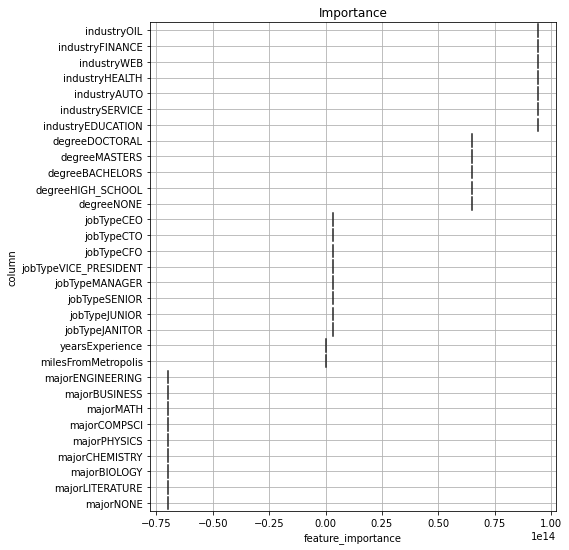

In [ ]:
%%time
from sklearn.linear_model import LinearRegression

lModel =LinearRegression()

lModel.fit(X_train,Y_train)

print_score(lModel)

fig, ax = visualize_importance(lModel.coef_,train_X)


### Random Forest Regressor

RMSE-Train: 19.922618829636626
RMSE-Test: 20.534931967909536
Score-Train: 0.7351188014341075
Score-Test: 0.7189797197357668
MedAE-Train: 12.939999999999998
MedAE-Test: 13.909166666666685
MeanAE-Train: 12.939999999999998
MeanAE-Test: 16.400629855496632 

CPU times: user 2min 28s, sys: 452 ms, total: 2min 28s
Wall time: 2min 46s


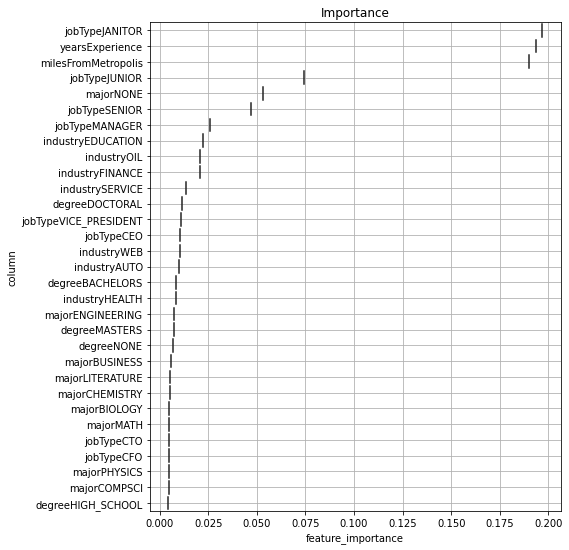

In [ ]:
%%time
from sklearn.ensemble import RandomForestRegressor

rf= RandomForestRegressor()

rf.fit(X_train.iloc[1:50000],Y_train.iloc[1:50000])

print_score(rf)

fig, ax = visualize_importance(rf.feature_importances_,train_X.iloc[1:50000])

### KNeighbors Regressor

### Please Note:
For KNN I used only 10000 samples out of 1000000.

In [ ]:
%%time
from sklearn.neighbors import KNeighborsRegressor

knnr = KNeighborsRegressor()

knnr.fit(X_train.iloc[1:50000],Y_train.iloc[1:50000])

print_score(knnr)

RMSE-Train: 21.275018866535195
RMSE-Test: 21.539714863479507
Score-Train: 0.6979365426612809
Score-Test: 0.6908060228038639
MedAE-Train: 14.0
MedAE-Test: 14.199999999999989
MeanAE-Train: 14.0
MeanAE-Test: 16.99271533333334 

CPU times: user 1h 12min 17s, sys: 3min 53s, total: 1h 16min 11s
Wall time: 1h 13min 3s


### Gradient Boosting Regressor

RMSE-Train: 19.416526976781977
RMSE-Test: 19.421127081935534
Score-Train: 0.7484053614245425
Score-Test: 0.7486377900715446
MedAE-Train: 13.603224380688786
MedAE-Test: 13.607848288119975
MeanAE-Train: 13.603224380688786
MeanAE-Test: 15.679143429473443 

CPU times: user 12.8 s, sys: 147 ms, total: 12.9 s
Wall time: 12.9 s


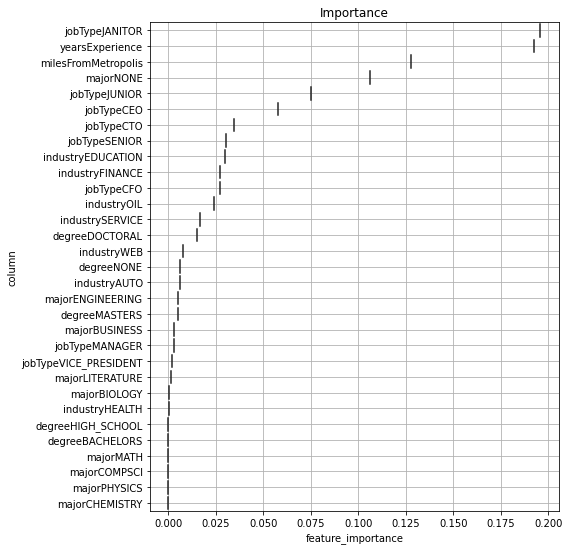

In [ ]:
%%time
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor()

GBR.fit(X_train.iloc[1:50000],Y_train.iloc[1:50000])

print_score(GBR)

fig, ax =visualize_importance(GBR.feature_importances_,train_X.iloc[1:50000])

### DecisionTree Regressor

In [ ]:
%%time
from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor()

DTR.fit(X_train.iloc[1:50000],Y_train.iloc[1:50000])

print_score(DTR)

RMSE-Train: 26.68913925191175
RMSE-Test: 27.693220548572025
Score-Train: 0.5246347658564743
Score-Test: 0.48890921031154166
MedAE-Train: 16.0
MedAE-Test: 17.0
MeanAE-Train: 16.0
MeanAE-Test: 21.576683888888887 

CPU times: user 2.29 s, sys: 131 ms, total: 2.42 s
Wall time: 2.79 s


### AdaBoost Regressor

In [ ]:
%%time
from sklearn.ensemble import AdaBoostRegressor

AdaBoost = AdaBoostRegressor()

AdaBoost.fit(X_train.iloc[1:50000],Y_train.iloc[1:50000])

print_score(AdaBoost)


RMSE-Train: 25.13896373218971
RMSE-Test: 25.180714100829828
Score-Train: 0.5782520075793912
Score-Test: 0.5774411420890919
MedAE-Train: 19.22449598959463
MedAE-Test: 19.22449598959463
MeanAE-Train: 19.22449598959463
MeanAE-Test: 20.950910866001916 

CPU times: user 30.9 s, sys: 1.93 s, total: 32.9 s
Wall time: 32.7 s


### XGBoost

[11:35:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE-Train: 19.422798305738308
RMSE-Test: 19.4283439766167
Score-Train: 0.7482428104641645
Score-Test: 0.7484509428674924
MedAE-Train: 13.595062255859375
MedAE-Test: 13.602447509765625
MeanAE-Train: 13.595062255859375
MeanAE-Test: 15.678909440345764 

CPU times: user 14.4 s, sys: 224 ms, total: 14.6 s
Wall time: 15.2 s


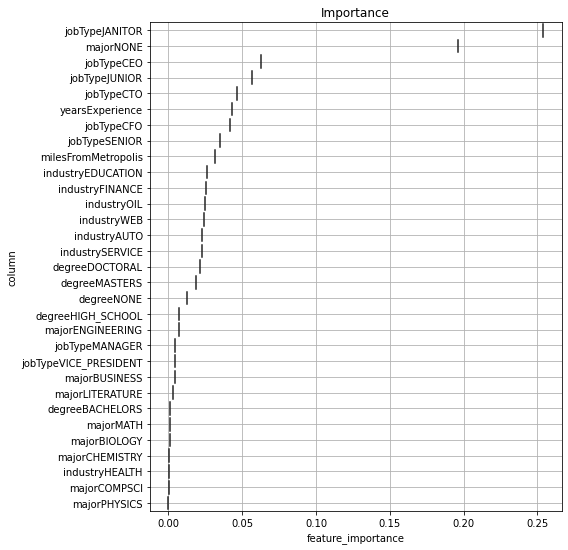

In [ ]:
%%time
from xgboost import XGBRegressor

xgbr =XGBRegressor()

xgbr.fit(X_train.iloc[1:50000],Y_train.iloc[1:50000])

print_score(xgbr)

fig, ax = visualize_importance(xgbr.feature_importances_,train_X.iloc[1:50000])

### Light Gradient Boosted Machine

RMSE-Train: 19.039120629573826
RMSE-Test: 19.066858008360818
Score-Train: 0.7580909855328171
Score-Test: 0.7577245602298229
MedAE-Train: 13.399679650214665
MedAE-Test: 13.423867941804602
MeanAE-Train: 13.399679650214665
MeanAE-Test: 15.449961555331917 

CPU times: user 25.6 s, sys: 151 ms, total: 25.8 s
Wall time: 25.8 s


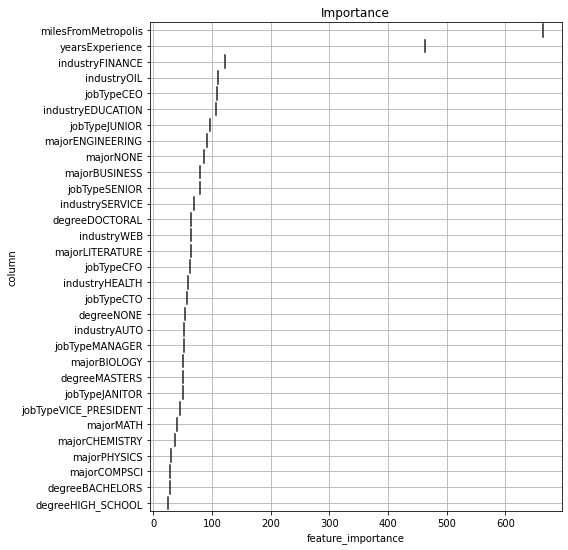

In [ ]:
%%time
import lightgbm as lgbm

lg =lgbm.LGBMRegressor()

lg.fit(X_train.iloc[1:50000],Y_train.iloc[1:50000])

print_score(lg)

fig, ax = visualize_importance(lg.feature_importances_,train_X.iloc[1:50000])

### Comparing all the model based on metric

In [ ]:
def compare_models(models,names,X_train,y_train,X_test,y_test):
    
    import sklearn.metrics as metrics
    from sklearn.model_selection import train_test_split


    # now, creating a list with the objects 
    data = {'Metrics':['rmse','MedAE','MAE','R-squared']}
    
    df_train =pd.DataFrame(data)
    
    df_test = pd.DataFrame(data)
    

    def rmse(x,y):
      return math.sqrt(((x-y)**2).mean())


    for (model,name) in zip(models,names):
      y_pred= model.predict(X_test)
      
       # then predict on the test set
      res = [rmse(model.predict(X_train),y_train),rmse(model.predict(X_test),y_test),
             metrics.median_absolute_error(model.predict(X_train),y_train),metrics.median_absolute_error(model.predict(X_test),y_test),
             metrics.mean_absolute_error(model.predict(X_train),y_train),metrics.mean_absolute_error(model.predict(X_test),y_test),
             metrics.r2_score(model.predict(X_train),y_train),metrics.r2_score(model.predict(X_test),y_test)]
      
      df_train[name] = [res[0],res[2],res[4],res[6]]
      
      df_test[name] = [res[1],res[3],res[5],res[7]]
      
    return df_train,df_test

In [ ]:
# list of models object
# list of models name
models=[lModel,DTR,rf,knnr,GBR,xgbr,AdaBoost]

names = ['Lr','Dtree','Forest','Knn','GBR','Xboost','AdaBoost']

comp_model_train,comp_model_test = compare_models(models,names,X_train,Y_train,X_test,Y_test)


#### RMSE of all model on train and test data

In [ ]:
# printing rmse comparision of model on train and test
print(comp_model_train[:1])
print('\n')
print(comp_model_test[:1])

  Metrics         Lr      Dtree     Forest        Knn        GBR     Xboost  \
0    rmse  19.615969  26.689139  19.922619  21.275019  19.416527  19.422798   

    AdaBoost  
0  25.138964  


  Metrics         Lr      Dtree     Forest        Knn        GBR     Xboost  \
0    rmse  19.589853  27.693221  20.534932  21.539715  19.421127  19.428344   

    AdaBoost  
0  25.180714  


#### All metrics on train and test data

In [ ]:
# printing comparision of model on train and test
print('Results on Test data')
comp_model_test

Results on Test data


Metrics         Lr      Dtree     Forest        Knn        GBR  \
0       rmse  19.589853  27.693221  20.534932  21.539715  19.421127   
1      MedAE  13.734375  17.000000  13.909167  14.200000  13.607848   
2        MAE  15.830043  21.576684  16.400630  16.992715  15.679143   
3  R-squared   0.656791   0.496791   0.639318   0.587646   0.618833   

      Xboost   AdaBoost  
0  19.428344  25.180714  
1  13.602448  19.224496  
2  15.678909  20.950911  
3   0.617972   0.166603

## Hyperparameter Tunning using RandomizedSearchCV

In [ ]:
# Helper function to perform hyper parameter tunning with RandomizedSearchCV
def random_Search(model,X_train, Y_train,param_grid):
  from sklearn.model_selection import RandomizedSearchCV

  # Random search of parameters, using 3 fold cross validation, 
  random = RandomizedSearchCV(estimator=model,param_distributions=param_grid,n_iter=20,cv=3,verbose=2,random_state=42,n_jobs=-1)
  random.fit(X_train.iloc[1:50000],Y_train.iloc[1:50000])
  print(random.best_params_)

In [ ]:
# creating parameters dictionary for tuning
rf_para_grid = {'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200],
               'max_features': ['auto', 'sqrt'],
               'max_depth': np.linspace(1, 32, 32, endpoint=True),
               'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True),
               'bootstrap': [True, False]}

# passing data for hyper parameter tuning with Randomized search cv
random_Search(RandomForestRegressor(),X_train,Y_train,param_grid=rf_para_grid)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'n_estimators': 64, 'min_samples_leaf': 0.1, 'max_features': 'auto', 'max_depth': 27.0, 'bootstrap': False}


In [ ]:
# creating GradientBoostRegressor parameters dictionary for tuning
GBR_para_grid = {
'n_estimators':  [1, 2, 4, 8, 16, 32, 64, 100, 200], 
 'learning_rate' : [1, 0.5, 0.25, 0.1, 0.05, 0.01],
 'max_depth': np.linspace(1, 32, 32, endpoint=True), 
 'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True)
}

# passing data for hyper parameter tuning with Randomized search cv
random_Search(GradientBoostingRegressor(),X_train,Y_train,param_grid=GBR_para_grid)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'n_estimators': 64, 'min_samples_split': 0.1, 'max_depth': 8.0, 'learning_rate': 0.25}


In [ ]:
# creating DecisionTreeRegressor parameters dictionary for tuning
DTR_para_grid = {
                  "splitter":["best","random"],
            "max_depth" : np.linspace(1, 32, 32, endpoint=True),
           "min_samples_leaf":np.linspace(0.1, 0.5, 5, endpoint=True),
           "min_weight_fraction_leaf":[0.1,0.2,0.5,0.9],
           "max_features":["auto","log2","sqrt",None],
           }

# passing data for hyper parameter tuning with Randomized search cv
random_Search(DecisionTreeRegressor(),X_train,Y_train,param_grid=DTR_para_grid)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'splitter': 'random', 'min_weight_fraction_leaf': 0.2, 'min_samples_leaf': 0.2, 'max_features': None, 'max_depth': 20.0}


In [ ]:
# creating XGBRegressor parameters dictionary for tuning
XGB_para_grid = {
    "learning_rate"    : [0.05, 0.10, 0.15] ,
 "max_depth"        : range(3,10,2),
 "min_child_weight" : range(1,6,2),
 "gamma"            : [ 0.0, 0.1, 0.2 ],
 "colsample_bytree" : [ 0.3, 0.4] 
 }

# passing data for hyper parameter tuning with Randomized search cv
random_Search(XGBRegressor(),X_train,Y_train,param_grid=XGB_para_grid)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[12:54:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.15, 'gamma': 0.1, 'colsample_bytree': 0.4}


## Using the best parameters and training the models

### Random Forest Regressor

RMSE-Train: 30.210281816302228
RMSE-Test: 30.23331325094853
Score-Train: 0.3909291225335262
Score-Test: 0.3908522932877063
MedAE-Train: 20.710192723899965
MedAE-Test: 20.710192723899965
MeanAE-Train: 20.710192723899965
MeanAE-Test: 24.200020640146114 

CPU times: user 12.9 s, sys: 260 ms, total: 13.2 s
Wall time: 13.2 s


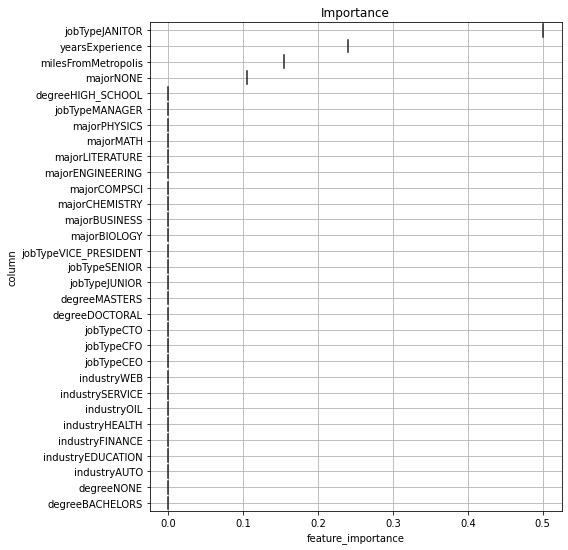

In [ ]:
%%time
rf= RandomForestRegressor(**{'n_estimators':64,'min_samples_leaf':0.1,'max_features':'auto','max_depth':27.0,'bootstrap':False})

rf.fit(X_train.iloc[1:50000],Y_train.iloc[1:50000])

print_score(rf)

fig, ax = visualize_importance(rf.feature_importances_,train_X.iloc[1:50000])

### Gradient Boosting Regressor

RMSE-Train: 19.09866131962313
RMSE-Test: 19.11611770976392
Score-Train: 0.7565755845097488
Score-Test: 0.756471093901491
MedAE-Train: 13.433565145937763
MedAE-Test: 13.456558380451966
MeanAE-Train: 13.433565145937763
MeanAE-Test: 15.487993292808678 

CPU times: user 13.9 s, sys: 162 ms, total: 14 s
Wall time: 14 s


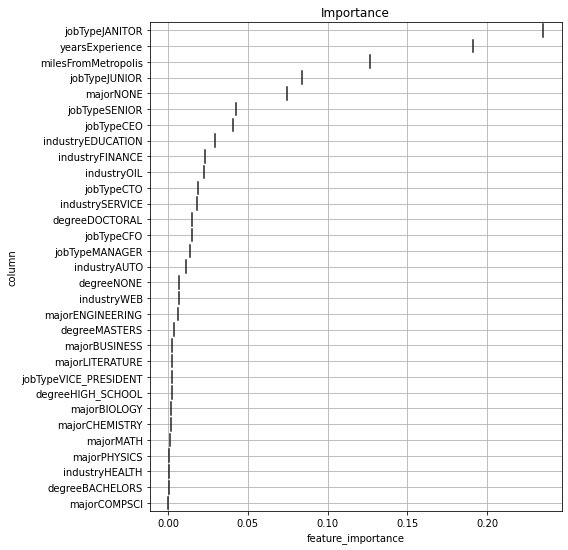

In [ ]:
%%time
GBR =GradientBoostingRegressor(**{'n_estimators':64,'min_samples_split':0.1,'max_depth':8.0,'learning_rate':0.25})

GBR.fit(X_train.iloc[1:50000],Y_train.iloc[1:50000])

print_score(GBR)

fig, ax = visualize_importance(GBR.feature_importances_,train_X.iloc[1:50000])

### Decision Tree Regrsessor

In [ ]:
%%time
DTR = DecisionTreeRegressor(**{'splitter':'random','min_weight_fraction_leaf':0.1,'min_samples_leaf':0.2,'max_features':None,'max_depth':8.0})

DTR.fit(X_train.iloc[1:50000],Y_train.iloc[1:50000])

print_score(DTR)

RMSE-Train: 35.82791124890645
RMSE-Test: 35.85073974667157
Score-Train: 0.1433542578922531
Score-Test: 0.1434605533785741
MedAE-Train: 24.700000000000003
MedAE-Test: 24.700000000000003
MeanAE-Train: 24.700000000000003
MeanAE-Test: 28.75999305799454 

CPU times: user 427 ms, sys: 105 ms, total: 532 ms
Wall time: 531 ms


### XGBoost Regressor

[13:03:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE-Train: 19.027961640300635
RMSE-Test: 19.044125605622224
Score-Train: 0.7583744722612078
Score-Test: 0.7583019201405585
MedAE-Train: 13.407611846923828
MedAE-Test: 13.4293212890625
MeanAE-Train: 13.407611846923828
MeanAE-Test: 15.434607373174032 

CPU times: user 20.9 s, sys: 260 ms, total: 21.2 s
Wall time: 21.5 s


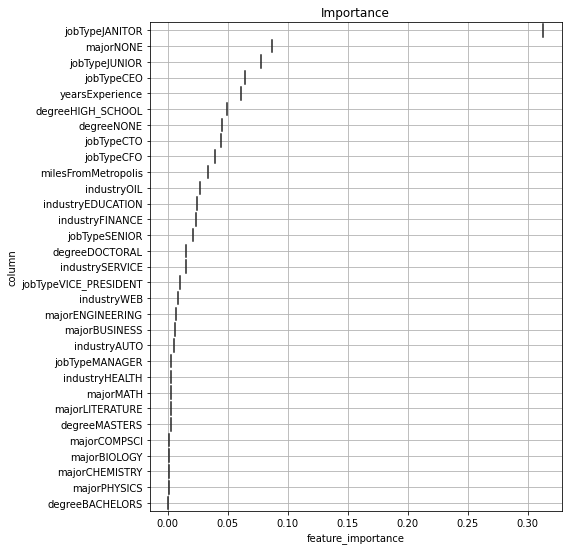

In [ ]:
%%time
xgbr =XGBRegressor(**{'min_child_weight':3,'max_depth':5,'learning_rate':0.15,'gamma':0.1,'colsample_bytree':0.4})

xgbr.fit(X_train.iloc[1:50000],Y_train.iloc[1:50000])

print_score(xgbr)

fig, ax = visualize_importance(xgbr.feature_importances_,train_X.iloc[1:50000])

## Comparing the metrics for tuned models

In [ ]:
models=[DTR,rf,GBR,xgbr]

names =['Dtree','Forest','GBR','Xboost']
comp_model_train,comp_model_test =compare_models(models,names,X_train,Y_train,X_test,Y_test) 


In [ ]:
print("Metrics on train data")
comp_model_train



Metrics on train data


Metrics      Dtree     Forest        GBR     Xboost
0       rmse  35.827911  30.210282  19.098661  19.027962
1      MedAE  24.700000  20.710193  13.433565  13.407612
2        MAE  28.759474  24.207447  15.473051  15.421144
3  R-squared  -4.875619  -0.567661   0.680566   0.675458

### Now working with the test dataset provided

In [ ]:
# test data 
test_X = test_data

In [ ]:
# passing test data for scaling
col_test = ['yearsExperience','milesFromMetropolis']

test_X = scale_data(test_X,col_test)


In [ ]:
# passing test dataset for one hot encoding process
encoder = OneHotEncoder()

test_drop =test_X.drop(['jobType','degree','major','industry'],axis=1)

test_X = encoder.fit_transform(test_X.drop(['yearsExperience','milesFromMetropolis'],axis=1))
test_X = test_X.join(test_drop['yearsExperience'])
test_X = test_X.join(test_drop['milesFromMetropolis'])
test_X.head()

jobTypeCEO  jobTypeCFO  jobTypeCTO  jobTypeJANITOR  jobTypeJUNIOR  \
0         0.0         0.0         0.0             0.0            0.0   
1         0.0         0.0         0.0             0.0            1.0   
2         0.0         0.0         1.0             0.0            0.0   
3         0.0         0.0         0.0             0.0            0.0   
4         0.0         0.0         0.0             0.0            1.0   

   jobTypeMANAGER  jobTypeSENIOR  jobTypeVICE_PRESIDENT  degreeBACHELORS  \
0             1.0            0.0                    0.0              0.0   
1             0.0            0.0                    0.0              0.0   
2             0.0            0.0                    0.0              0.0   
3             1.0            0.0                    0.0              0.0   
4             0.0            0.0                    0.0              0.0   

   degreeDOCTORAL  ...  majorPHYSICS  industryAUTO  industryEDUCATION  \
0             0.0  ...           0.0           0.0                0.0   
1             0.0  ...           0.0           1.0                0.0   
2             0.0  ...           0.0           0.0                0.0   
3             0.0  ...           0.0           0.0                0.0   
4             1.0  ...           0.0           0.0                0.0   

   industryFINANCE  industryHEALTH  industryOIL  industrySERVICE  industryWEB  \
0              0.0             1.0          0.0              0.0          0.0   
1              0.0             0.0          0.0              0.0          0.0   
2              0.0             1.0          0.0              0.0          0.0   
3              0.0             0.0          1.0              0.0          0.0   
4              0.0             0.0          1.0              0.0          0.0   

   yearsExperience  milesFromMetropolis  
0         0.916667             0.737374  
1         0.833333             0.474747  
2         0.708333             0.090909  
3         0.583333             0.969697  
4         0.416667             0.444444  

[5 rows x 31 columns]

In [ ]:
# Performing the prediction on the test dataset
y_predicted =lModel.predict(test_X)
y_predicted

array([115.5625  ,  92.3125  , 167.015625, ...,  45.03125 , 164.703125,
       111.953125])

In [ ]:
# creating a dataframe of predicted results 
predictions = pd.DataFrame(y_predicted)

In [ ]:
# predicted values in dataframe
predictions

0
0       115.562500
1        92.312500
2       167.015625
3       105.421875
4       119.171875
...            ...
999995  168.343750
999996  110.328125
999997   45.031250
999998  164.703125
999999  111.953125

[1000000 rows x 1 columns]

### Conclusion
According to this model, the predicted value I got,
matches with the actual target values. The model is performing well.
Even though I used only 50000 samples, the model may perform much better when trained on complete dataset.
I have performed EDA, preprocessing, buid different models, visualized feature importance, did hyper parameter tunning of each model and did prediction.